<center>
  <font color=red size=10>2 - Análise Descritiva</font>
</center>


 <font size=5>Nesta fase será apresentada uma análise univariada com estatísticas resumidas, gráficos informativos e insights iniciais sobre todos os atributos do conjunto de dados. Essa etapa permite obter uma compreensão geral da natureza dos dados, identificar tendências preliminares e iniciar o processo de geração de hipóteses para análises posteriores.</font>


# <font color=red>1 - Provisionamento</font>

## 1.1 - Instalar e importar dependências


As instalações das bibliotecas estão comentadas pois estão sendo instaladas em um ambiente virtual onde são executados os notebooks.

In [1]:
# !pip install pandas==2.0.1
# !pip install matplotlib==3.7.1
# !pip install numpy==1.24.3
# !pip install scikit-learn==1.3.1
# !pip install seaborn==0.12.2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sys

In [3]:
print('Versão do python -> %s' % sys.version)
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do matplotlib -> %s' % plt.matplotlib.__version__)
print('Versão do seaborn -> %s' % sns.__version__)

Versão do python -> 3.10.6 (v3.10.6:9c7b4bd164, Aug  1 2022, 17:13:48) [Clang 13.0.0 (clang-1300.0.29.30)]
Versão do pandas -> 2.0.1
Versão do numpy -> 1.24.3
Versão do matplotlib -> 3.7.1
Versão do seaborn -> 0.12.2


## 1.2 - Carregamento dos arquivos

In [4]:
pagamentos = pd.read_csv('../data/pagamentos.csv')
avaliacoes = pd.read_csv('../data/avaliacoes.csv')
dados = pd.read_csv('../data/relatorio_vendas.csv')

## 1.3 - Transformar as colunas com datas para o formato datetime

In [5]:
colunas_data = ['data_limite_envio', 'data_compra', 'data_aprovacao_pedido', 'data_entrega_transportadora', 'data_entrega_cliente', 'data_estimada_entrega']
for coluna in colunas_data:
    dados[coluna] = pd.to_datetime(dados[coluna], format='ISO8601')

In [6]:
avaliacoes['avaliacao_data'] = pd.to_datetime(avaliacoes['avaliacao_data'], format='ISO8601')
avaliacoes['avaliacao_data_resposta'] = pd.to_datetime(avaliacoes['avaliacao_data_resposta'], format='ISO8601')

# <font color=red>2 - Conhecendo os dados</font>

## 2.1 - Dataset do projeto

<font color=red size=6> Brazilian E-Commerce Public Dataset by Olist</font>

O <b>Conjunto de Dados Públicos de E-Commerce Brasileiro da Olist</b> é um conjunto de dados públicos de e-commerce brasileiro com pedidos feitos na loja Olist. O conjunto de dados contém informações de 100 mil pedidos feitos de 2016 a 2018 em diversos marketplaces no Brasil. Suas características permitem visualizar um pedido de várias perspectivas: pelo preço, pagamento e desempenho de frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes.

Estes são dados comerciais reais, foram anonimizados, e as referências às empresas e parceiros no texto das avaliações foram substituídas pelos nomes de Game of Thrones great houses.

<font size=4>Fonte dos Dados</font>

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

## 2.2 - Tipos das Variáveis

**Qualitativos Nominais:**

- **pagamento_forma:** Forma de pagamento utilizada pelo cliente.
- **produto_categoria:** Categoria do produto.
- **produto:** Nome do produto.
- **cliente:** Cidade do cliente concatenado com o seu id_unico.
- **cliente_cep:** CEP (Código de Endereçamento Postal) do cliente.
- **cliente_cidade:** Cidade do cliente.
- **cliente_estado:** Estado do cliente.
- **cliente_regiao:** Região do cliente.
- **vendedor:** Cidade do vendedor concatenado com o seu id.
- **vendedor_cep:** CEP do vendedor.
- **vendedor_cidade:** Cidade do vendedor.
- **vendedor_estado:** Estado do vendedor.
- **vendedor_regiao:** Região do vendedor.
- **avaliacao_titulo:** Título do comentário da avaliação.
- **avaliacao_comentario:** Comentário da avaliação.

**Qualitativos Ordinais:**

- **avaliacao_pontuacao:** Pontuação atribuída à avaliação (pode ser de 1 a 5, por exemplo).

**Quantitativos Discretos:**

- **pagamento_parcelas:** Número de parcelas do pagamento.

**Quantitativos Contínuos:**

- **preco:** Preço do produto.
- **frete:** Valor do frete.
- **pagamento_valor:** Valor do pagamento.

**Variáveis Temporais:**

- **data_limite_envio:** Data limite para o envio do pedido.
- **data_compra:** Data da compra.
- **data_aprovacao_pedido:** Data de aprovação do pedido.
- **data_entrega_transportadora:** Data de entrega à transportadora.
- **data_entrega_cliente:** Data de entrega ao cliente.
- **data_estimada_entrega:** Data estimada de entrega.
- **avaliacao_data:** Data da avaliação.
- **avaliacao_data_resposta:** Data de resposta à avaliação.

**Varáveis de Identificação e Referência:**

- **pedido_id:** Identificador único para cada pedido.
- **pedido_item_id:** Identificador único para cada item do pedido.
- **avaliacao_id:** Identificador único para cada avaliação.
- **produto_id:** Identificador único para cada produto.
- **vendedor_id:** Identificador único para cada vendedor.
- **cliente_id:** Identificador único para cada cliente.
- **cliente_id_unico:** Identificador único do cliente.
- **produto_categoria_ref:** Referência da categoria do produto.
- **cliente_cidade_ref:** Referência da cidade do cliente.
- **cliente_estado_ref:** Referência do estado do cliente.
- **cliente_regiao_ref:** Referência da região do cliente.
- **vendedor_cidade_ref:** Referência da cidade do vendedor.
- **vendedor_estado_ref:** Referência do estado do vendedor.
- **vendedor_regiao_ref:** Referência da região do vendedor.
- **cliente_lat:** Latitude do cliente.
- **cliente_lon:** Longitude do cliente.
- **vendedor_lat:** Latitude do vendedor.
- **vendedor_lon:** Longitude do vendedor.

## 2.3 - Atributos Criados

- **cliente**
- **cliente_lat**
- **cliente_lon**
- **cliente_regiao**
- **cliente_regiao_ref**
- **cliente_cidade_ref**
- **cliente_estado_ref**
- **vendedor**
- **vendedor_lat**
- **vendedor_lon**
- **vendedor_regiao**
- **vendedor_regiao_ref**
- **vendedor_cidade_ref**
- **vendedor_estado_ref**
- **produto**
- **produto_categoria_ref**

## 2.4 - Atributos Removidos

- **comprimento_nome_produto**
- **comprimento_descricao_produto**
- **quantidade_fotos_produto**
- **peso_produto_gramas**
- **comprimento_produto_cm**
- **altura_produto_cm**
- **largura_produto_cm**
- **pagamentos_sequencia**
- **pedido_status**

## 2.5 - Tratamentos realizados nos dados originais

- Para tratar os dados nulos das colunas **"cliente_lat"**, **"cliente_lon"**, **"vendedor_lat"**, **"vendedor_lon"**, foi colocado os dados da mesma cidade ignorando a exatidão de localização do CEP.
- Para tratar os dados nulos das colunas **"cliente_lat"**, **"cliente_lon"**, **"vendedor_lat"**, **"vendedor_lon"** que não tinham referência específica para suas cidades, foram usadas coordenadas aleatórias correspondentes aos seus respectivos estados.
- Os valores nulos da coluna  **"produto_categoria"** foi preenchida com o valor **"indefinido"**.
- A coluna **"produto"** foi criada com o valor da categoria do produto e a soma de todas as outras colunas de pesos e medidas, levando em consideração, se todas as características dos comprimentos de nome e descrição e todas as medidas e pesos forem iguais, quer dizer que se refere ao mesmo produto.
- Foi padronizada a coluna **"produto_categoria"** para uma melhor análise mantendo a qualificação original no nome do produto.
- Foram removida as linhas irrelevantes para as análises da coluna **"pedido_status"**, pois serão usados somente pedidos entregues e concluídos, após apagadas essas linhas, restou somente o valor **"entregue"**, consequentemente a coluna foi removida em seguida.
- Para preencher os dados nulos da coluna **"data_aprovacao_pedido"** foi calculado o tempo médio em que o pedido é aprovado e esse valor foi adicionado à data da compra.
- Essa mesma lógica acima foi usada para preencher a coluna **"data_entrega_transportadora"** e **"data_entrega_cliente"**.
- Foram removida as linhas com o valor do pagamento igual a "0" da coluna **"pagamento_valor"**.
- Foram criados os atributos **"vendedor"** e **"cliente"** sendo composto com o nome da **cidade** onde eles estão localizados e o número dos seus respectivos **ids** criando assim uma identificação única  para melhorar a visualização nas análises.

# <font color=red> 3 - Visão Geral dos Conjuntos de Dados</font>

**Observação:**
- Será feita a junção dos DataFrames em um que será intitulado **relatorio_vendas** baseado no DataFrame **itens_pedidos**, pois é o DataFrame que contém os dados de todos os pedidos detalhados com cada item separadamente.
- Será agregado a este DataFrame os dados dos DataFrames **pedidos**, **produtos**, **clientes** e **vendedores** que serão usados de forma conjunta para as análises e para os modelos de machine learning.
- Após uma análise mais detalhada, foi decidido que os  DataFrames **pagamentos** e **avaliações** não serão agregados ao DataFrame **relatorio_vendas**, levando em consideração que o mesmo atributo de junção "pedido_id" se repete nestes DataFrames por motivos diferentes, mas iria criar uma duplicidade de dados, mas principalmente porque será feito uma análise de sentimentos com os dados do DataFrame avaliações e será feito uma análise de pagamentos com os dados do DataFrame **pagamentos** e esses atributos não terão relação com as análises e modelos de machine learning que serão feitos com o DataFrame **relatorio_vendas**.
- O único atributo que teria relação com o DataFrame **relatorio_vendas** seria o atributo "pagamento_valor" do DataFrame **pagamentos**, mas temos esse valor distribuído na coluna "preco" em cada item do dataframe **itens_pedidos**. 

## 3.1 - DataFrame "Pagamentos"

In [7]:
pagamentos.head()

,pedido_id,pagamento_forma,pagamento_parcelas,pagamento_valor
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [8]:
pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103877 entries, 0 to 103876
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pedido_id           103877 non-null  object 
 1   pagamento_forma     103877 non-null  object 
 2   pagamento_parcelas  103877 non-null  int64  
 3   pagamento_valor     103877 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
pagamentos.nunique()

pedido_id             99437
pagamento_forma           4
pagamento_parcelas       24
pagamento_valor       29076
dtype: int64

In [10]:
pagamentos.isnull().sum()

pedido_id             0
pagamento_forma       0
pagamento_parcelas    0
pagamento_valor       0
dtype: int64

In [11]:
pagamentos.describe()

,pagamento_parcelas,pagamento_valor
count,103877.000000,103877.000000
mean,2.853509,154.113732
std,2.687112,217.498755
min,0.000000,0.010000
25%,1.000000,56.820000
50%,1.000000,100.000000
75%,4.000000,171.840000
max,24.000000,13664.080000


## 3.2 - DataFrame "Avaliações"

In [12]:
avaliacoes.head()

,avaliacao_id,pedido_id,avaliacao_pontuacao,avaliacao_titulo,avaliacao_comentario,avaliacao_data,avaliacao_data_resposta
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,parabéns lojas lannister adorei comprar pela i...,2018-03-01,2018-03-02 10:26:53


In [13]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   avaliacao_id             99224 non-null  object        
 1   pedido_id                99224 non-null  object        
 2   avaliacao_pontuacao      99224 non-null  int64         
 3   avaliacao_titulo         11568 non-null  object        
 4   avaliacao_comentario     40976 non-null  object        
 5   avaliacao_data           99224 non-null  datetime64[ns]
 6   avaliacao_data_resposta  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [14]:
avaliacoes.nunique()

avaliacao_id               98410
pedido_id                  98673
avaliacao_pontuacao            5
avaliacao_titulo            4009
avaliacao_comentario       35565
avaliacao_data               636
avaliacao_data_resposta    98248
dtype: int64

In [15]:
avaliacoes.duplicated().sum()

0

In [16]:
avaliacoes.isnull().sum()

avaliacao_id                   0
pedido_id                      0
avaliacao_pontuacao            0
avaliacao_titulo           87656
avaliacao_comentario       58248
avaliacao_data                 0
avaliacao_data_resposta        0
dtype: int64

In [17]:
avaliacoes.describe()

,avaliacao_pontuacao,avaliacao_data,avaliacao_data_resposta
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


## 3.3 - DataFrame "Relatorio_Vendas"

In [18]:
dados.head()

,pedido_id,pedido_item_id,produto_id,vendedor_id,data_limite_envio,preco,frete,cliente_id,data_compra,data_aprovacao_pedido,...,vendedor,vendedor_cep,vendedor_cidade,vendedor_cidade_ref,vendedor_estado,vendedor_estado_ref,vendedor_regiao,vendedor_regiao_ref,vendedor_lat,vendedor_lon
0,3b61aab5de69abc1731138bd104a777f,1,6aa063e063f2ab982b471e58afe06d72,610f72e407cdd7caaa2f8167b0163fd8,2018-09-18 21:10:15,999.99,24.77,8e29c6e9c795eda30cf7f47244720132,2018-08-25 20:59:18,2018-08-25 21:10:15,...,sao paulo 610f72e407cdd7caaa2f8167b0163fd8,1201,sao paulo,3658,SP,26,sudeste,3,-23.534322,-46.652852
1,7cfdf7265c9572fc7b7cbd3b9cc438b7,2,17e18b0c88a853dd6de3e48a7cfa9d9a,cee48807215b30a12ca2ca10ffb5f250,2018-09-14 12:30:56,20.00,19.25,00791d8bb3acb245dc0b865656e18fff,2018-08-21 12:20:32,2018-08-21 12:30:56,...,guaruja cee48807215b30a12ca2ca10ffb5f250,11431,guaruja,1553,SP,26,sudeste,3,-23.996850,-46.268588
2,7cfdf7265c9572fc7b7cbd3b9cc438b7,1,bdef7736f61a507f68b31bd86ddaf69d,3db66a856d18a9cba7c9241fc5221c50,2018-08-27 12:30:56,69.90,19.25,00791d8bb3acb245dc0b865656e18fff,2018-08-21 12:20:32,2018-08-21 12:30:56,...,ponte nova 3db66a856d18a9cba7c9241fc5221c50,35430,ponte nova,2984,MG,11,sudeste,3,-20.406680,-42.894077
3,1afe384f199748cff7a42c9902065560,1,4c2a4020fcd651812100ebbeac1b2753,610f72e407cdd7caaa2f8167b0163fd8,2018-09-14 02:09:37,599.99,29.18,df646960391593c3f41cd448d84800c7,2018-08-21 01:45:43,2018-08-21 02:09:37,...,sao paulo 610f72e407cdd7caaa2f8167b0163fd8,1201,sao paulo,3658,SP,26,sudeste,3,-23.534322,-46.652852
4,59eaa904b3f0dbde2785ac1b27eccd18,1,61919b39651acb61ec24307ed8b9502d,f61c63d13f7cd800549d5acdd390ae72,2018-09-13 14:55:28,299.00,14.75,3e90b5882ce0e665b837de00a2a8625c,2018-08-20 10:19:46,2018-08-20 14:55:28,...,pilar do sul f61c63d13f7cd800549d5acdd390ae72,18185,pilar do sul,2873,SP,26,sudeste,3,-23.802797,-47.725534


In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110195 entries, 0 to 110194
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   pedido_id                    110195 non-null  object        
 1   pedido_item_id               110195 non-null  int64         
 2   produto_id                   110195 non-null  object        
 3   vendedor_id                  110195 non-null  object        
 4   data_limite_envio            110195 non-null  datetime64[ns]
 5   preco                        110195 non-null  float64       
 6   frete                        110195 non-null  float64       
 7   cliente_id                   110195 non-null  object        
 8   data_compra                  110195 non-null  datetime64[ns]
 9   data_aprovacao_pedido        110195 non-null  datetime64[ns]
 10  data_entrega_transportadora  110195 non-null  datetime64[ns]
 11  data_entrega_cliente      

In [20]:
dados.nunique()

pedido_id                      96477
pedido_item_id                    21
produto_id                     32216
vendedor_id                     2970
data_limite_envio              91343
preco                           5859
frete                           6924
cliente_id                     96477
data_compra                    95955
data_aprovacao_pedido          88287
data_entrega_transportadora    80107
data_entrega_cliente           95664
data_estimada_entrega            445
cliente_id_unico               93358
cliente                        93471
cliente_cep                    14889
cliente_cidade                  4085
cliente_cidade_ref              4085
cliente_estado                    27
cliente_estado_ref                27
cliente_regiao                     5
cliente_regiao_ref                 5
cliente_lat                    14734
cliente_lon                    14734
produto_categoria                 25
produto                        25934
produto_categoria_ref             25
v

In [21]:
dados.duplicated().sum()

0

In [22]:
dados.isna().sum()

pedido_id                      0
pedido_item_id                 0
produto_id                     0
vendedor_id                    0
data_limite_envio              0
preco                          0
frete                          0
cliente_id                     0
data_compra                    0
data_aprovacao_pedido          0
data_entrega_transportadora    0
data_entrega_cliente           0
data_estimada_entrega          0
cliente_id_unico               0
cliente                        0
cliente_cep                    0
cliente_cidade                 0
cliente_cidade_ref             0
cliente_estado                 0
cliente_estado_ref             0
cliente_regiao                 0
cliente_regiao_ref             0
cliente_lat                    0
cliente_lon                    0
produto_categoria              0
produto                        0
produto_categoria_ref          0
vendedor                       0
vendedor_cep                   0
vendedor_cidade                0
vendedor_c

In [23]:
dados.describe()

,pedido_item_id,data_limite_envio,preco,frete,data_compra,data_aprovacao_pedido,data_entrega_transportadora,data_entrega_cliente,data_estimada_entrega,cliente_cep,...,cliente_regiao_ref,cliente_lat,cliente_lon,produto_categoria_ref,vendedor_cep,vendedor_cidade_ref,vendedor_estado_ref,vendedor_regiao_ref,vendedor_lat,vendedor_lon
count,110195.000000,110195,110195.000000,110195.000000,110195,110195,110195,110195,110195,110195.000000,...,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000
mean,1.198176,2018-01-08 16:57:21.284486400,119.980926,19.947845,2018-01-02 02:55:41.905676544,2018-01-02 13:26:46.409300992,2018-01-05 09:44:10.694287360,2018-01-14 14:15:37.399237632,2018-01-25 22:10:45.219837440,35155.711974,...,2.766305,-21.235116,-46.218692,11.187958,24467.581133,2546.508372,23.226526,3.059222,-22.796060,-47.195039
min,1.000000,2016-09-19 23:11:33,0.850000,0.000000,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1003.000000,...,0.000000,-33.691550,-72.664409,0.000000,1001.000000,1.000000,3.000000,0.000000,-32.095725,-63.895935
25%,1.000000,2017-09-21 14:55:25,39.900000,13.080000,2017-09-15 07:30:12.500000,2017-09-15 14:07:40,2017-09-18 22:27:28,2017-09-26 20:18:53.500000,2017-10-06 00:00:00,11310.000000,...,3.000000,-23.591887,-48.124243,6.000000,6429.000000,1627.000000,23.000000,3.000000,-23.607263,-48.838906
50%,1.000000,2018-01-26 20:15:52,74.900000,16.260000,2018-01-21 10:13:10,2018-01-22 13:56:45,2018-01-24 18:52:54,2018-02-02 21:08:40,2018-02-16 00:00:00,24344.000000,...,3.000000,-22.927658,-46.635650,10.000000,13568.000000,3004.000000,26.000000,3.000000,-23.424571,-46.743793
75%,1.000000,2018-05-10 20:23:07.500000,134.185000,21.150000,2018-05-05 16:04:51.500000,2018-05-05 23:01:51,2018-05-08 14:20:30,2018-05-15 20:29:08.500000,2018-05-28 00:00:00,59066.000000,...,3.000000,-20.149978,-43.679006,18.000000,28035.000000,3658.000000,26.000000,3.000000,-21.754867,-46.521174
max,21.000000,2018-09-18 21:10:15,6735.000000,409.680000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,99980.000000,...,4.000000,42.184003,-4.947823,24.000000,99730.000000,4188.000000,26.000000,4.000000,-2.505689,-15.841271
std,0.706678,NaN,182.301081,15.697283,NaN,NaN,NaN,NaN,NaN,29901.297289,...,1.001604,5.565401,4.040216,6.602915,27624.823254,1159.165283,5.202549,0.565665,2.705516,2.566388


## 3.2 - Conclusões Iniciais do Conjunto de Dados

- O conjunto de dados é composto por 114.855 lançamentos de vendas, com 46 atributos, sendo 13 qualitativos nominais, 2 qualitativos ordinais, 3 quantitativos contínuos, 2 quantitativos discretos, 8 no formato de datas e 18 Varáveis de identificação ou referência. 

- Foram criados 15 atributos, sendo 6 deles para referência de localização, 8 para referência numérica de dados qualitativos e 1 para referência do produto aproveitando as informações presentes no dataset.

- Há 87656 valores nulos na coluna "avaliação_titulo" e 58248 na "avaliação_comentario", que foram deixados assim, primeiro porque condiz com a realidade ao qual o cliente não quis colocar nenhum comentário, também porque não afetará a análise de sentimentos e não será usado em modelos de machine learning.

# <font color=red>4 - Análise Univariada</font>

## 4.1 - Variáveis Qualitativas Nominais

- 4.1.1 - pagamento_forma
- 4.1.2 - produto_categoria
- 4.1.3 - produto
- 4.1.4 - cliente
- 4.1.5 - cliente_cep
- 4.1.6 - cliente_cidade
- 4.1.7 - cliente_estado
- 4.1.8 - cliente_regiao
- 4.1.9 - vendedor
- 4.1.10 - vendedor_cep
- 4.1.11 - vendedor_cidade
- 4.1.12 - vendedor_estado
- 4.1.13 - vendedor_regiao
- 4.1.14 - avaliacao_titulo
- 4.1.15 - avaliacao_comentario

### 4.1.1 - pagamento_forma

**Observação:**
A forma de pagamento é referente ao pagamento por produto, ou seja, se o cliente comprou 3 produtos em somente um pedido e pagou em boleto, agregará 3 ocorrências na frequência absoluta do pagamento em boleto.

Resumo estatístico:

In [24]:
pagamentos['pagamento_forma'].describe()

count          103877
unique              4
top       credit_card
freq            76795
Name: pagamento_forma, dtype: object

Frequência absoluta e percentual:

In [25]:
# Frequência absoluta
freq_absoluta = pagamentos['pagamento_forma'].value_counts()

# Frequência Percentual
freq_percentual = pagamentos['pagamento_forma'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='pagamento_forma')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
pagamento_forma,,
credit_card,76795,74%
boleto,19784,19%
voucher,5769,6%
debit_card,1529,1%


Gráfico de barras:

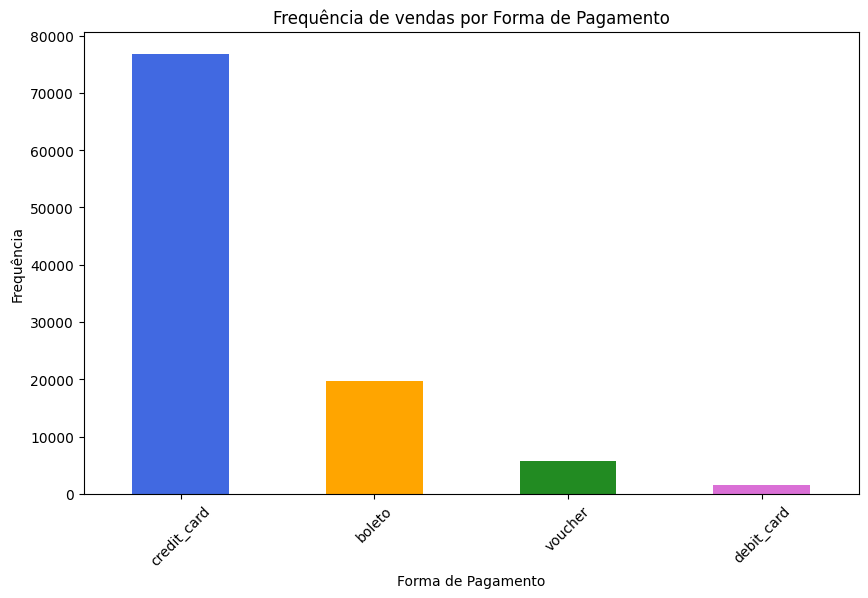

In [26]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

plt.figure(figsize=(10, 6))
freq_absoluta.plot(kind='bar', color=cores)
plt.title('Frequência de vendas por Forma de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### 4.1.2 - produto_categoria

Resumo estatístico:

In [27]:
dados['produto_categoria'].describe()

count             110195
unique                25
top       casa_decoracao
freq               22129
Name: produto_categoria, dtype: object

Frequência absoluta e percentual:

In [28]:
# Frequência absoluta
freq_absoluta = dados['produto_categoria'].value_counts()

# Frequência Percentual
freq_percentual = dados['produto_categoria'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='produto_categoria')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
produto_categoria,,
casa_decoracao,22129,20%
beleza_perfumaria,12805,12%
moveis,10737,10%
esporte_lazer,8431,8%
informatica,7926,7%
relogios,5859,5%
telefonia,4685,4%
jardinagem,4301,4%
automotivo,4140,4%


Gráfico de barras:

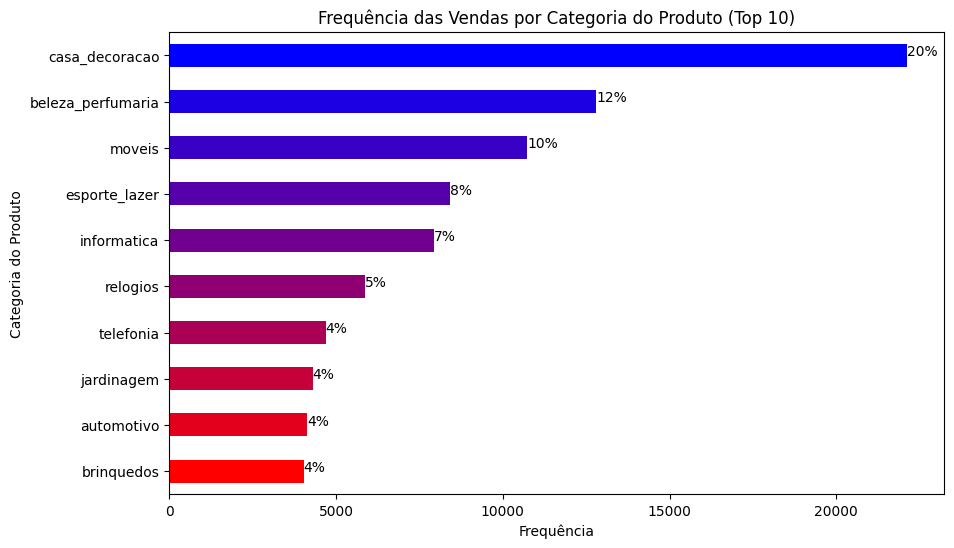

In [29]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Categoria do Produto (Top 10)')
plt.ylabel('Categoria do Produto')
plt.xlabel('Frequência')

# Adicione a frequência percentual em cada barra
for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)


plt.gca().invert_yaxis()
plt.show()

Countplot do Seaborn (Gráfico de Contagem):

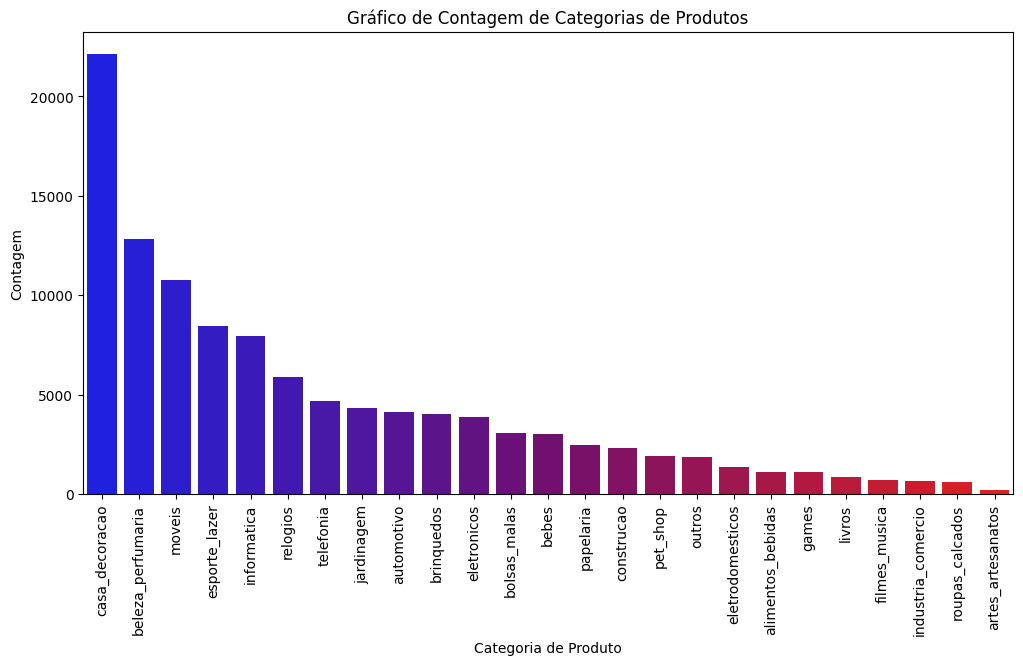

In [30]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list('gradiente_cores', [(0, 0, 1), (1, 0, 0)])
cores = gradiente_cores(np.linspace(0, 1, 25))

plt.figure(figsize=(12, 6)) 
sns.countplot(data=dados, x='produto_categoria', order=dados['produto_categoria'].value_counts().index, palette=cores)
plt.xlabel('Categoria de Produto')
plt.ylabel('Contagem')
plt.title('Gráfico de Contagem de Categorias de Produtos')
plt.xticks(rotation=90)
plt.show()

### 4.1.3 - produto

Resumo estatístico:

In [31]:
dados['produto'].describe()

count                    110195
unique                    25934
top       moveis_decoracao 3643
freq                        520
Name: produto, dtype: object

Frequência absoluta:

In [32]:
freq_absoluta = dados['produto'].value_counts()
freq_absoluta.head(10)

produto
moveis_decoracao 3643          520
ferramentas_jardim 2038        484
cama_mesa_banho 1783           479
ferramentas_jardim 2251        390
ferramentas_jardim 2157        389
ferramentas_jardim 1982        373
informatica_acessorios 8563    332
relogios_presentes 1183        325
beleza_saude 774               288
informatica_acessorios 1529    272
Name: count, dtype: int64

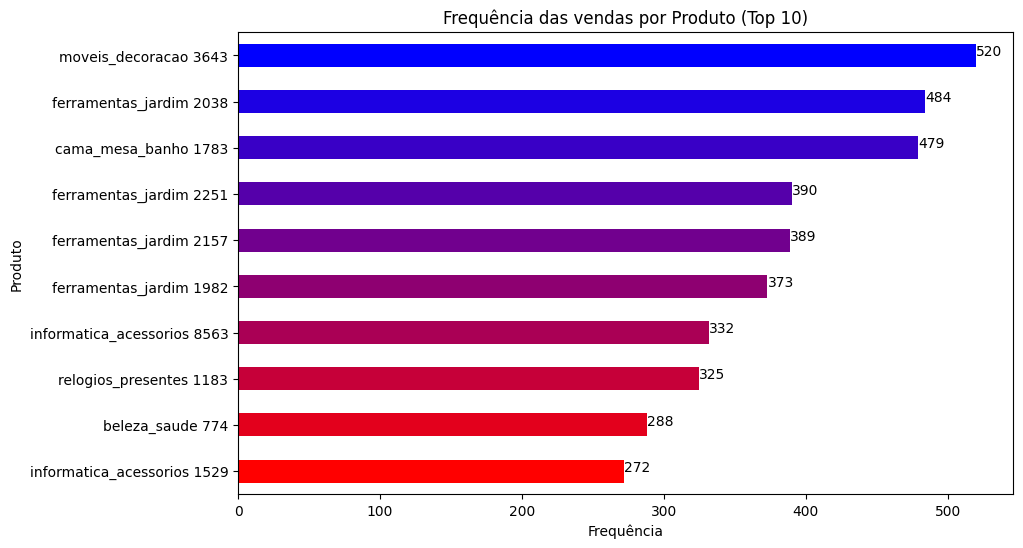

In [33]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das vendas por Produto (Top 10)')
plt.ylabel('Produto')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.4 - cliente

Resumo estatístico:

In [34]:
dados['cliente'].describe()

count                                            110195
unique                                            93471
top       porto alegre c8460e4251689ba205045f3ea17884a1
freq                                                 24
Name: cliente, dtype: object

Frequência absoluta:

In [95]:
freq_absoluta = dados['cliente'].value_counts()
freq_absoluta.head(10)

cliente
porto alegre c8460e4251689ba205045f3ea17884a1        24
sao paulo 4546caea018ad8c692964e3382debd19           21
sao paulo c402f431464c72e27330a67f7b94d4fb           20
goiania 698e1cf81d01a3d389d96145f7fa6df8             20
uniao da vitoria 0f5ac8d5c31de21d2f25e24be15bbffb    18
sao paulo 8d50f5eadf50201ccdcedfb9e2ac8455           15
cicero dantas eae0a83d752b1dd32697e0e7b4221656       15
goiania 11f97da02237a49c8e783dfda6f50e8e             15
praia grande 3e43e6105506432c953e165fb2acf44c        14
indaiatuba f7ea4eef770a388bd5b225acfc546604          14
Name: count, dtype: int64

Gráfico de barras:

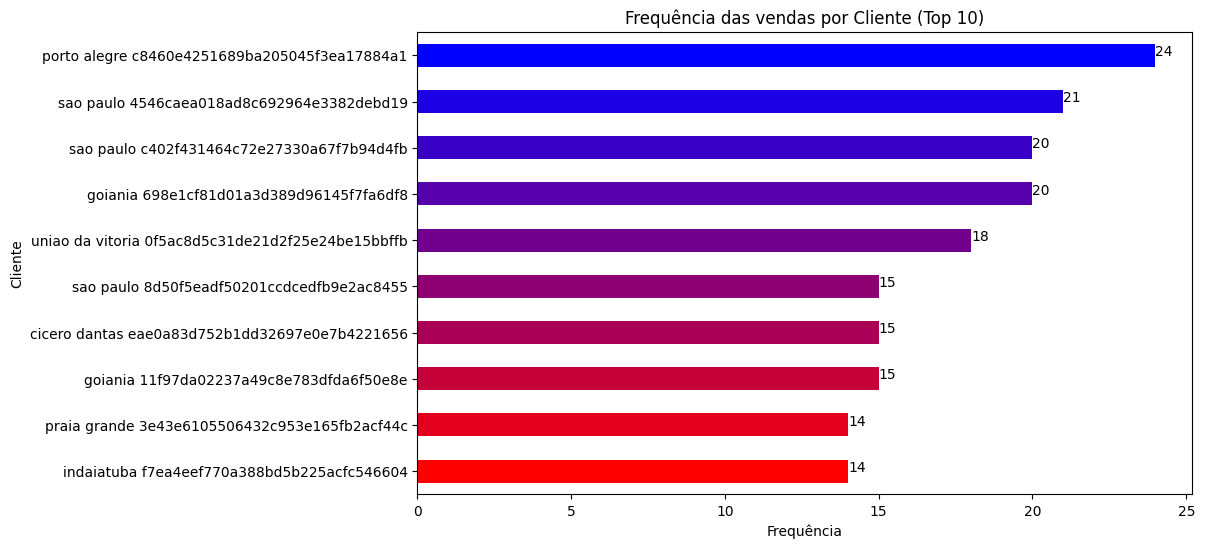

In [96]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das vendas por Cliente (Top 10)')
plt.ylabel('Cliente')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.5 - cliente_cep

Resumo estatístico:

In [35]:
dados['cliente_cep'].describe()

count    110195.000000
mean      35155.711974
std       29901.297289
min        1003.000000
25%       11310.000000
50%       24344.000000
75%       59066.000000
max       99980.000000
Name: cliente_cep, dtype: float64

Frequência absoluta:

In [36]:
freq_absoluta = dados['cliente_cep'].value_counts()
freq_absoluta.head(10)


cliente_cep
22790    147
22793    146
24220    139
24230    134
22775    118
29101    112
35162    110
13087    103
13212    102
22631    101
Name: count, dtype: int64

Gráfico de barras:

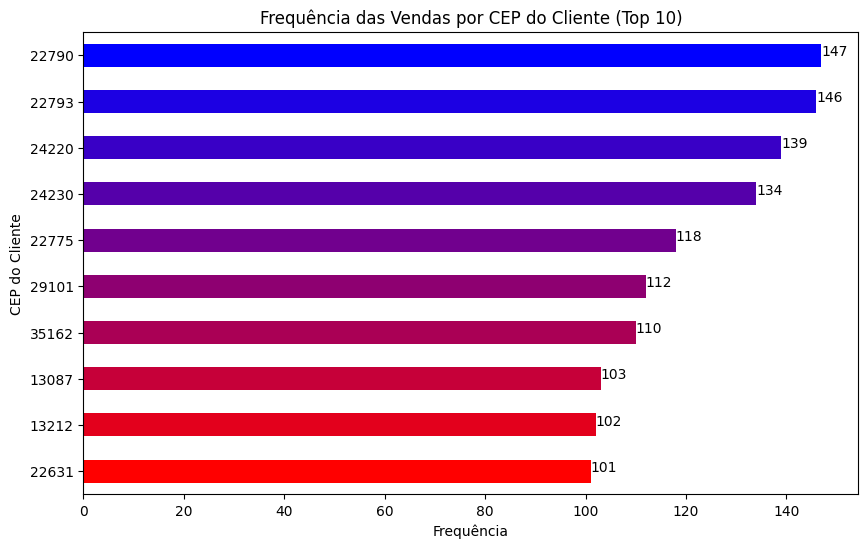

In [37]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por CEP do Cliente (Top 10)')
plt.ylabel('CEP do Cliente')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.6 - cliente_cidade

Resumo estatístico:

In [38]:
dados['cliente_cidade'].describe()

count        110195
unique         4085
top       sao paulo
freq          17400
Name: cliente_cidade, dtype: object

Frequência absoluta e percentual:

In [39]:
freq_absoluta = dados['cliente_cidade'].value_counts()
freq_percentual = dados['cliente_cidade'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='cliente_cidade')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
cliente_cidade,,
sao paulo,17400,16%
rio de janeiro,7592,7%
belo horizonte,3087,3%
brasilia,2341,2%
curitiba,1727,2%
campinas,1626,1%
porto alegre,1573,1%
salvador,1358,1%
guarulhos,1294,1%


Gráfico de barras:

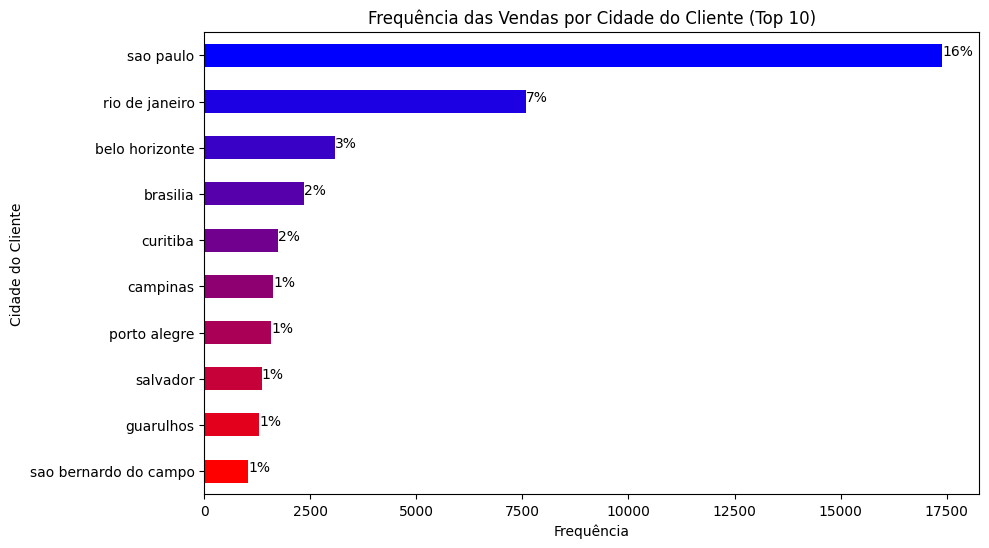

In [40]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Cidade do Cliente (Top 10)')
plt.ylabel('Cidade do Cliente')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.7 - cliente_estado

Resumo estatístico:

In [41]:
dados['cliente_estado'].describe()

count     110195
unique        27
top           SP
freq       46446
Name: cliente_estado, dtype: object

Frequência absoluta e percentual:

In [42]:
freq_absoluta = dados['cliente_estado'].value_counts()
freq_percentual = dados['cliente_estado'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='cliente_estado')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
cliente_estado,,
SP,46446,42%
RJ,14143,13%
MG,12916,12%
RS,6134,6%
PR,5649,5%
SC,4097,4%
BA,3683,3%
DF,2355,2%
GO,2277,2%


Gráfico de barras:

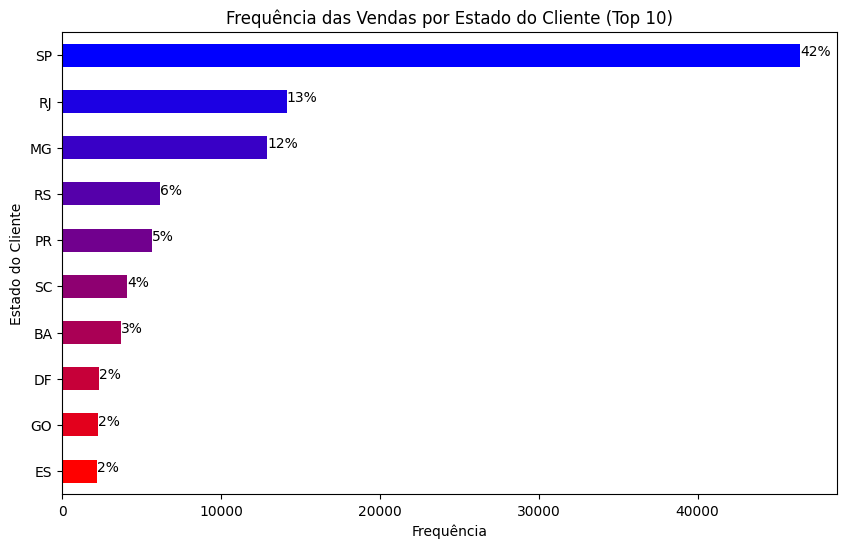

In [43]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Estado do Cliente (Top 10)')
plt.ylabel('Estado do Cliente')
plt.xlabel('Frequência')
for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)
plt.gca().invert_yaxis()
plt.show()

### 4.1.8 - cliente_regiao

Resumo estatístico:

In [44]:
dados['cliente_regiao'].describe()

count      110195
unique          5
top       sudeste
freq        75730
Name: cliente_regiao, dtype: object

Frequência absoluta e percentual:

In [45]:
# Frequência absoluta
freq_absoluta = dados['cliente_regiao'].value_counts()

# Frequência Percentual
freq_percentual = dados['cliente_regiao'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='cliente_regiao')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
cliente_regiao,,
sudeste,75730,69%
sul,15880,14%
nordeste,10087,9%
centro-oeste,6480,6%
norte,2018,2%


Gráfico de barras:

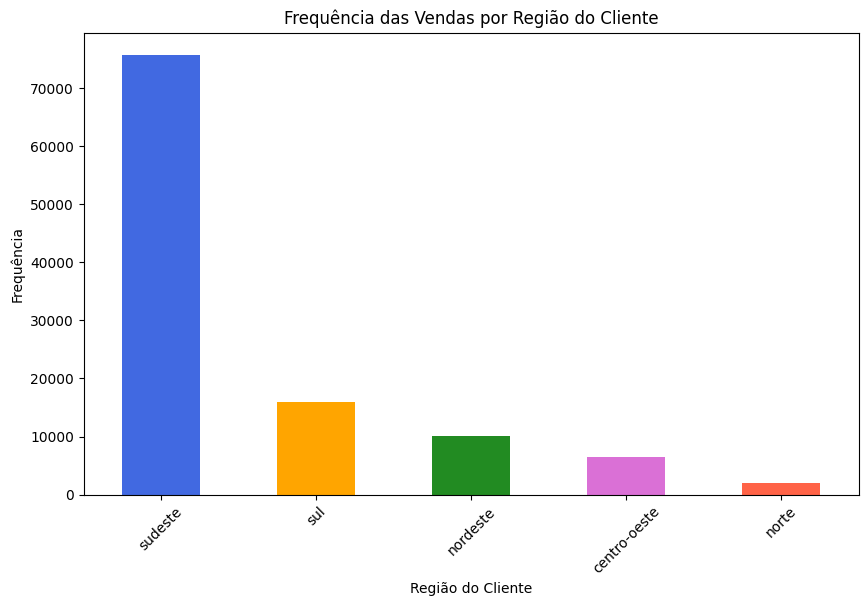

In [46]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'tomato', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal']

plt.figure(figsize=(10, 6))
freq_absoluta.plot(kind='bar', color=cores)
plt.title('Frequência das Vendas por Região do Cliente')
plt.xlabel('Região do Cliente')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### 4.1.9 - vendedor

Resumo estatístico:

In [98]:
dados['vendedor'].describe()

count                                         110195
unique                                          2970
top       sao paulo 6560211a19b47992c3666cc44a7e94c0
freq                                            1996
Name: vendedor, dtype: object

Frequência absoluta:

In [99]:
freq_absoluta = dados['vendedor'].value_counts()
freq_absoluta.head(10)

vendedor
sao paulo 6560211a19b47992c3666cc44a7e94c0                1996
ibitinga 4a3ca9315b744ce9f8e9374361493884                 1949
sao jose do rio preto 1f50f920176fa81dab994f9023523100    1926
santo andre cc419e0650a3c5ba77189a1882b7556a              1719
piracicaba da8622b14eb17ae2831f4ac5b9dab84a               1548
sao paulo 955fee9216a65b617aa5c0531780ce60                1472
sao paulo 1025f0e2d44d7041d6cf58b6550e0bfa                1420
itaquaquecetuba 7c67e1448b00f6e969d365cea6b010ab          1355
sao paulo ea8482cd71df3c1969d7b9473ff13abc                1188
sao paulo 7a67c85e85bb2ce8582c35f2203ad736                1155
Name: count, dtype: int64

Gráfico de barras:

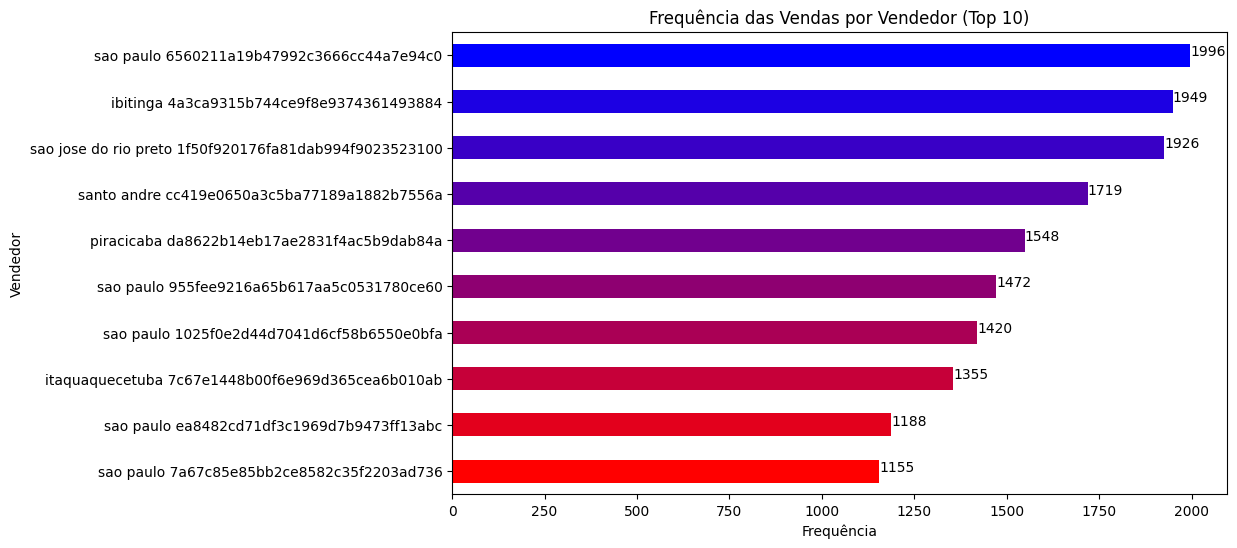

In [100]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Vendedor (Top 10)')
plt.ylabel('Vendedor')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.10 - vendedor_cep

Resumo estatístico:

In [47]:
dados['vendedor_cep'].describe()

count    110195.000000
mean      24467.581133
std       27624.823254
min        1001.000000
25%        6429.000000
50%       13568.000000
75%       28035.000000
max       99730.000000
Name: vendedor_cep, dtype: float64

Frequência absoluta:

In [48]:
freq_absoluta = dados['vendedor_cep'].value_counts()
freq_absoluta.head(10)

vendedor_cep
14940    7621
5849     2010
15025    2003
9015     1724
13405    1564
4782     1489
8577     1445
3204     1420
4160     1213
13232    1179
Name: count, dtype: int64

Gráfico de barras:

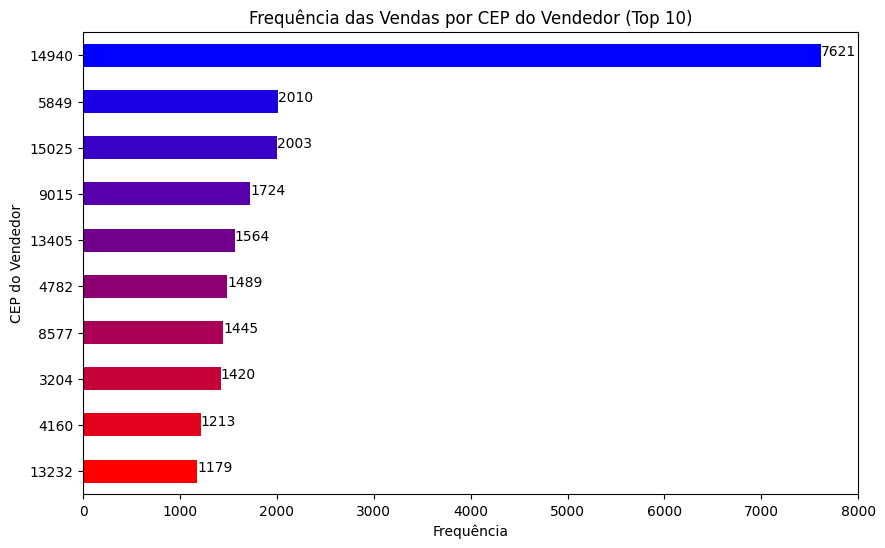

In [49]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por CEP do Vendedor (Top 10)')
plt.ylabel('CEP do Vendedor')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(value), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.11 - vendedor_cidade

In [50]:
dados['vendedor_cidade'].describe()

count        110195
unique          593
top       sao paulo
freq          27359
Name: vendedor_cidade, dtype: object

Frequência absoluta e percentual:

In [51]:
# Frequência absoluta
freq_absoluta = dados['vendedor_cidade'].value_counts()

# Frequência Percentual
freq_percentual = dados['vendedor_cidade'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='vendedor_cidade')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
vendedor_cidade,,
sao paulo,27359,25%
ibitinga,7621,7%
curitiba,2955,3%
santo andre,2886,3%
sao jose do rio preto,2544,2%
belo horizonte,2522,2%
rio de janeiro,2356,2%
guarulhos,2309,2%
ribeirao preto,2208,2%


Gráfico de barras:

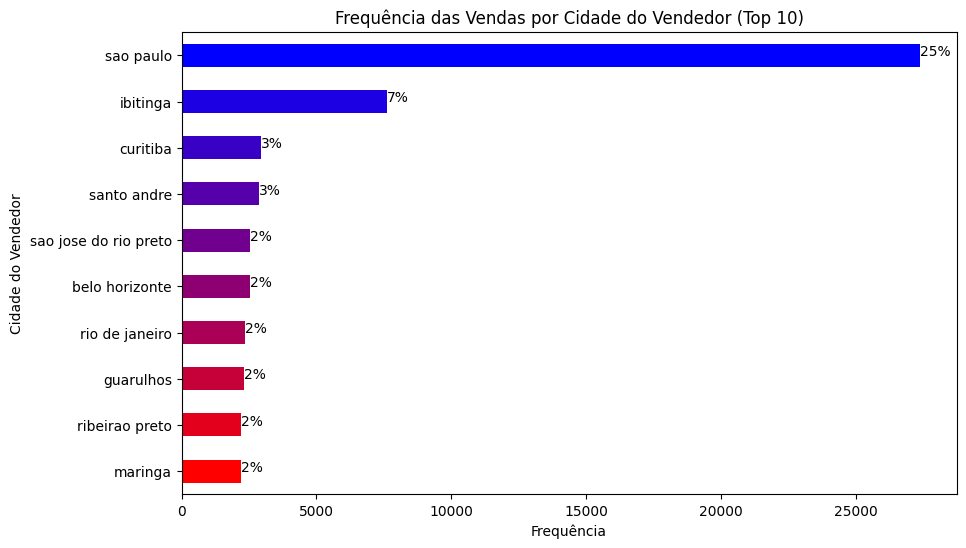

In [52]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Cidade do Vendedor (Top 10)')
plt.ylabel('Cidade do Vendedor')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.12 - vendedor_estado

In [53]:
dados['vendedor_estado'].describe()

count     110195
unique        22
top           SP
freq       78604
Name: vendedor_estado, dtype: object

Frequência absoluta e percentual:

In [54]:
# Frequência absoluta
freq_absoluta = dados['vendedor_estado'].value_counts()

# Frequência Percentual
freq_percentual = dados['vendedor_estado'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='vendedor_estado')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']

resultado.head(10)

,Frequência Absoluta,Frequência Percentual
vendedor_estado,,
SP,78604,71%
MG,8601,8%
PR,8487,8%
RJ,4685,4%
SC,4000,4%
RS,2169,2%
DF,883,1%
BA,624,1%
GO,508,0%


Gráfico de barras:

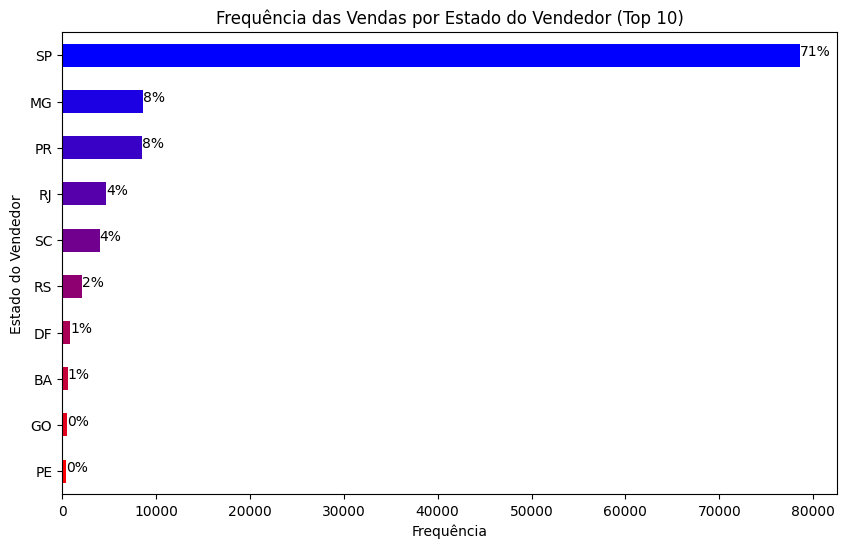

In [55]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Estado do Vendedor (Top 10)')
plt.ylabel('Estado do Vendedor')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index]), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

### 4.1.13 - vendedor_regiao

Resumo estatístico:

In [56]:
dados['vendedor_regiao'].describe()

count      110195
unique          5
top       sudeste
freq        92254
Name: vendedor_regiao, dtype: object

Frequência absoluta e percentual:

In [57]:
# Frequência absoluta
freq_absoluta = dados['vendedor_regiao'].value_counts()

# Frequência Percentual
freq_percentual = dados['vendedor_regiao'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='vendedor_regiao')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
vendedor_regiao,,
sudeste,92254,84%
sul,14656,13%
nordeste,1675,2%
centro-oeste,1585,1%
norte,25,0%


Gráfico de barras:

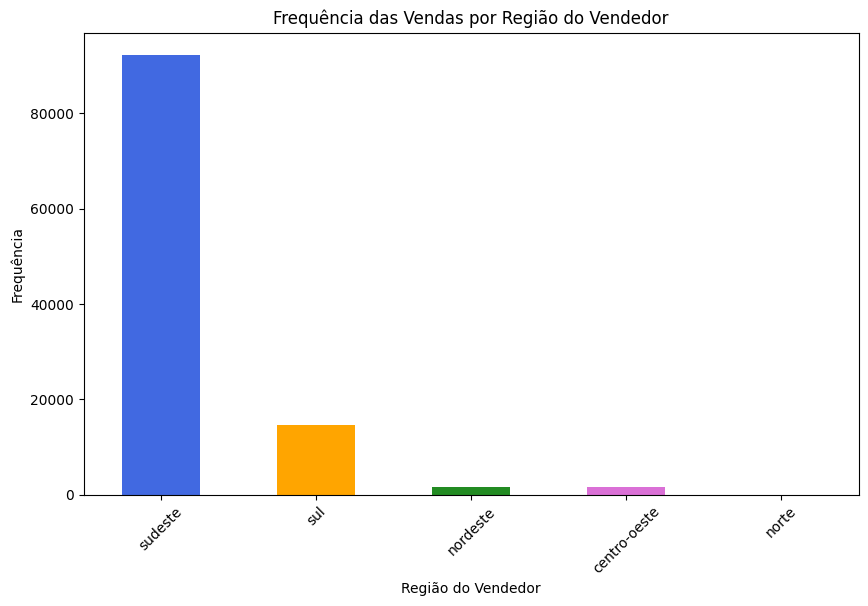

In [58]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'tomato', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal']

plt.figure(figsize=(10, 6))
freq_absoluta.plot(kind='bar', color=cores)
plt.title('Frequência das Vendas por Região do Vendedor')
plt.xlabel('Região do Vendedor')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### 4.1.14 - avaliacao_titulo

Resumo estatístico:

In [59]:
avaliacoes['avaliacao_titulo'].describe()

count         11568
unique         4009
top       recomendo
freq            825
Name: avaliacao_titulo, dtype: object

Frequência absoluta e percentual:

In [60]:
# Frequência absoluta
freq_absoluta = avaliacoes['avaliacao_titulo'].value_counts()

# Frequência Percentual
freq_percentual = avaliacoes['avaliacao_titulo'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='avaliacao_titulo')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado

,Frequência Absoluta,Frequência Percentual
avaliacao_titulo,,
recomendo,825,7%
super recomendo,578,5%
bom,406,4%
muito bom,333,3%
excelente,304,3%
...,...,...
compraria novamente,1,0%
irritante,1,0%
gerou duvida,1,0%


### 4.1.15 - avaliacao_comentario

Resumo estatístico:

In [61]:
avaliacoes['avaliacao_comentario'].describe()

count         40976
unique        35565
top       muito bom
freq            369
Name: avaliacao_comentario, dtype: object

Frequência absoluta e percentual:

In [62]:
# Frequência absoluta
freq_absoluta = avaliacoes['avaliacao_comentario'].value_counts()

# Frequência Percentual
freq_percentual = avaliacoes['avaliacao_comentario'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'

resultado = pd.merge(freq_absoluta, freq_percentual, on='avaliacao_comentario')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head()

,Frequência Absoluta,Frequência Percentual
avaliacao_comentario,,
muito bom,369,1%
bom,309,1%
otimo,207,1%
recomendo,175,0%
ok,139,0%


## 4.2 - Variáveis Qualitativas Ordinais

- 4.2.1 - avaliacao_pontuacao

### 4.2.1 - avaliacao_pontuacao

Resumo estatístico:

In [63]:
avaliacoes['avaliacao_pontuacao'].describe()
summary = avaliacoes['avaliacao_pontuacao'].describe()
median = avaliacoes['avaliacao_pontuacao'].median()
mode = avaliacoes['avaliacao_pontuacao'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      99224.000000
mean           4.086421
std            1.347579
min            1.000000
25%            4.000000
50%            5.000000
75%            5.000000
max            5.000000
Mediana        5.000000
Moda           5.000000
Name: avaliacao_pontuacao, dtype: float64


Frequência absoluta e percentual:

In [64]:
# Frequência absoluta
freq_absoluta = avaliacoes['avaliacao_pontuacao'].value_counts()

# Frequência Percentual
freq_percentual = avaliacoes['avaliacao_pontuacao'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='avaliacao_pontuacao')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head()

,Frequência Absoluta,Frequência Percentual
avaliacao_pontuacao,,
5,57328,58%
4,19142,19%
1,11424,12%
3,8179,8%
2,3151,3%


Gráfico de barras:

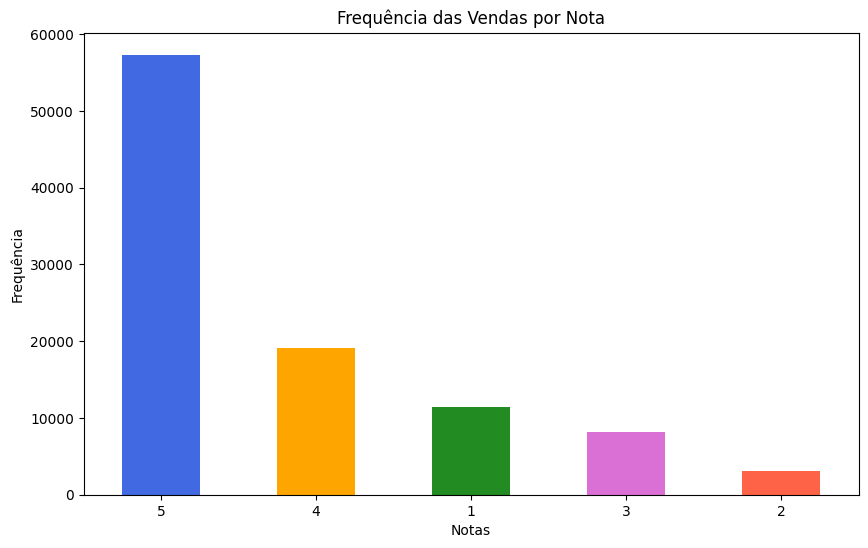

In [65]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'tomato', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal']

plt.figure(figsize=(10, 6))
freq_absoluta.plot(kind='bar', color=cores)
plt.title('Frequência das Vendas por Nota')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.show()

**Conclusão da variável "avaliacao_pontuacao":**

- A **média** das pontuações de avaliação é aproximadamente 4.08. Isso indica que em geral os clientes estão satisfeitos com o atendimento.
- A **mediana** é 5, o que significa que mais da metade das avaliações tem nota 5.
- O **desvio padrão** é aproximadamente 1.35. 
- O **primeiro quartil (25%)** é 4, o que significa que 25% das avaliações têm nota 4 ou menos.
- O **segundo quartil (50%)** é 5, indicando que pelo menos metade das avaliações têm uma nota 5.
- O **terceiro quartil (75%)** é 5.

- A maioria das avaliações **(58%)** receberam a nota máxima **5**.
- Cerca de **77%** das avaliações receberam nota **4** ou mais alta.
- **85%** das avaliações receberam nota **3** ou mais alta.
- Quase **15%** das avaliações receberam notas abaixo de **3**.

Em geral, os clientes demonstraram um alto nível de satisfação com o atendimento, conforme indicado pela média de pontuação de aproximadamente 4.08 e pela predominância de avaliações com pontuação máxima de 5. No entanto, a presença de avaliações menos favoráveis, representando quase 15% do total, destaca a importância contínua de manter padrões elevados de atendimento ao cliente e de abordar as preocupações dos clientes insatisfeitos. Isso é fundamental para aprimorar a experiência geral do cliente e manter a qualidade dos serviços prestados.

## 4.3 - Variáveis Quantitativas Discretas

- 4.3.1 - pagamento_parcelas


### 4.3.1 - pagamento_parcelas

**Observação:**
O número de parcelas é referente ao pagamento por produto, ou seja, se o cliente comprou 3 produtos em somente um pedido e pagou em 4 parcelas, agregará 3 ocorrências na frequência absoluta do pagamento em 4 parcelas.

Resumo estatístico:

In [66]:
summary = pagamentos['pagamento_parcelas'].describe()
median = pagamentos['pagamento_parcelas'].median()
mode = pagamentos['pagamento_parcelas'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      103877.000000
mean            2.853509
std             2.687112
min             0.000000
25%             1.000000
50%             1.000000
75%             4.000000
max            24.000000
Mediana         1.000000
Moda            1.000000
Name: pagamento_parcelas, dtype: float64


Frequência absoluta e percentual:

In [67]:
# Frequência absoluta
freq_absoluta = pagamentos['pagamento_parcelas'].value_counts()

# Frequência Percentual
freq_percentual = pagamentos['pagamento_parcelas'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='pagamento_parcelas')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(30)

,Frequência Absoluta,Frequência Percentual
pagamento_parcelas,,
1,52537,51%
2,12413,12%
3,10461,10%
4,7098,7%
10,5328,5%
5,5239,5%
8,4268,4%
6,3920,4%
7,1626,2%


Grafico de barras:

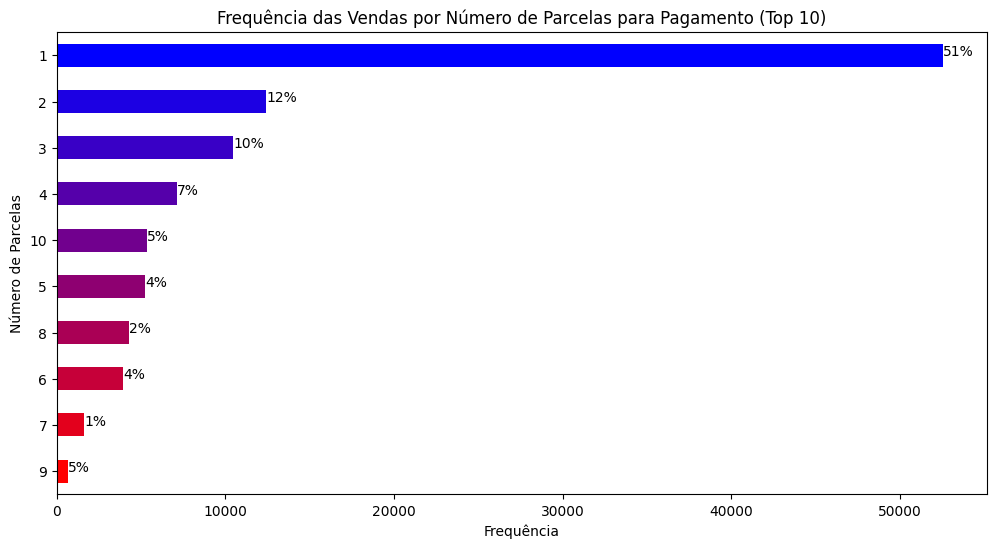

In [68]:
gradiente_cores = mcolors.LinearSegmentedColormap.from_list(
    'gradiente_cores', [(0, 0, 1), (1, 0, 0)], N=10)
cores = gradiente_cores(np.linspace(0, 1, 10))

top_10 = freq_absoluta.head(10)
plt.figure(figsize=(12, 6))
top_10.plot(kind='barh', color=cores)
plt.title('Frequência das Vendas por Número de Parcelas para Pagamento (Top 10)')
plt.ylabel('Número de Parcelas')
plt.xlabel('Frequência')

for index, value in enumerate(top_10):
    plt.text(value, index, str(freq_percentual[index+1]), color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

Histograma:

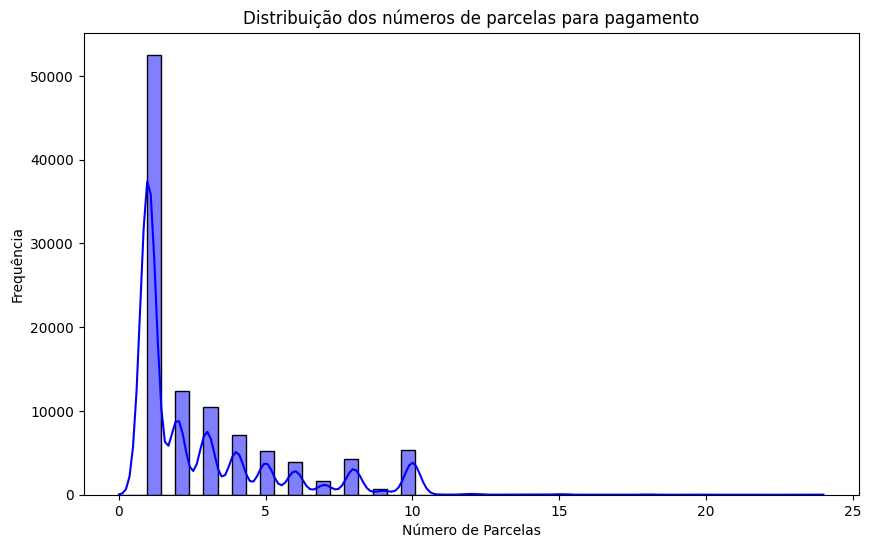

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(pagamentos['pagamento_parcelas'], bins=50, kde=True, color='blue')
plt.title('Distribuição dos números de parcelas para pagamento')
plt.xlabel('Número de Parcelas')
plt.ylabel('Frequência')
plt.show()

**Conclusão da Variável "pagamento_parcelas":**

Ao analisar a variável "pagamento_parcelas", que representa o número de parcelas escolhidas pelos clientes para pagamento de seus pedidos, foram obtidas diversas informações relevantes.

   - A distribuição de parcelamentos varia de 1 a 24 vezes, com a metade dos pedidos sendo pagos a vista (50% dos casos).
   - Parcelamentos de 2 vezes (12%) e 3 vezes (10%) também são relativamente comuns.
   - Parcelamentos em quantidades até 10 vezes representam uma porcentagem significativa dos pedidos, demonstrando uma diversidade nas escolhas dos clientes.
   - Parcelamentos em quantidades maiores que 10 vezes são menos comuns, representando menos de 1% dos pedidos.

Em resumo, a análise da variável "pagamento_parcelas" indica que a maioria dos clientes opta por pagar seus pedidos a vista, seguido por parcelamentos em 2 ou 3 vezes. Isso sugere que a conveniência do pagamento integral é valorizada pelos clientes, mas ainda há uma demanda considerável por opções de parcelamento em pequenas quantidades.

Essas informações podem ser úteis para estratégias de precificação, promoções e opções de pagamento oferecidas pela empresa, visando atender às preferências e necessidades dos clientes.

## 4.4 - Variáveis Quantitativas Contínuas

- 4.4.1 - preco
- 4.4.2 - frete
- 4.4.3 - pagamento_valor


### 4.4.1 - preco

Resumo estatístico:

In [70]:
summary = dados['preco'].describe()
median = dados['preco'].median()
mode = dados['preco'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      110195.000000
mean          119.980926
std           182.301081
min             0.850000
25%            39.900000
50%            74.900000
75%           134.185000
max          6735.000000
Mediana        74.900000
Moda           59.900000
Name: preco, dtype: float64


Frequência absoluta e percentual:

In [71]:
# Frequência absoluta
freq_absoluta = dados['preco'].value_counts()

# Frequência Percentual
freq_percentual = dados['preco'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='preco')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
preco,,
59.90,2445,2%
69.90,1950,2%
49.90,1918,2%
89.90,1519,1%
99.90,1406,1%
39.90,1310,1%
29.90,1301,1%
19.90,1189,1%
79.90,1185,1%


Histograma:

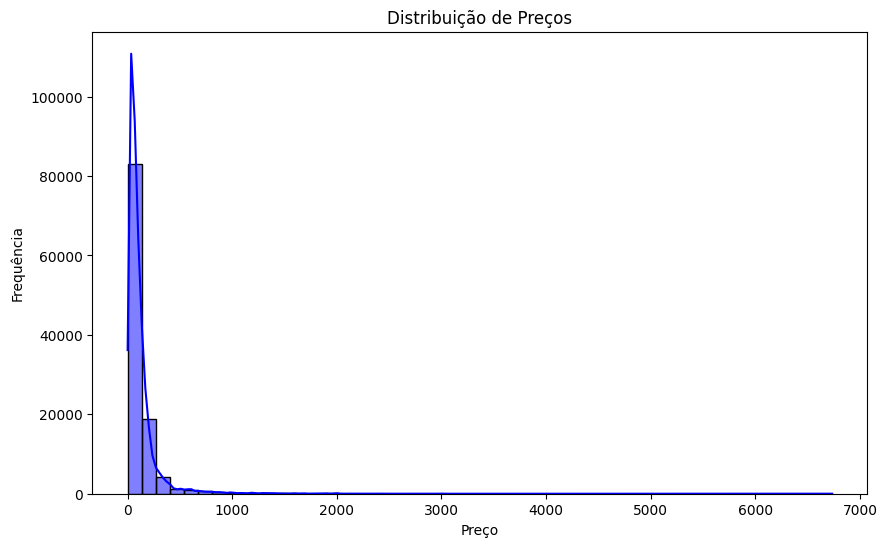

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(dados['preco'], bins=50, kde=True, color='blue')
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

Outliers:

In [73]:
# Quartis
q1 = dados['preco'].quantile(0.25)
q3 = dados['preco'].quantile(0.75)

# Amplitude interquartil (IQR)
iqr = q3 - q1

# Limites superior e inferior para detecção de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Outliers
outliers = dados[(dados['preco'] < limite_inferior) | (dados['preco'] > limite_superior)]

# Número de outliers
num_outliers = len(outliers)

# Porcentagem de outliers em relação ao total de dados
porcentagem_outliers = (num_outliers / len(dados) * 100)

print(f'Número de outliers: {num_outliers}')
print(f'Porcentagem de outliers: {porcentagem_outliers:.2f}%')

Número de outliers: 8162
Porcentagem de outliers: 7.41%


Boxplot para visualizar os outliers:

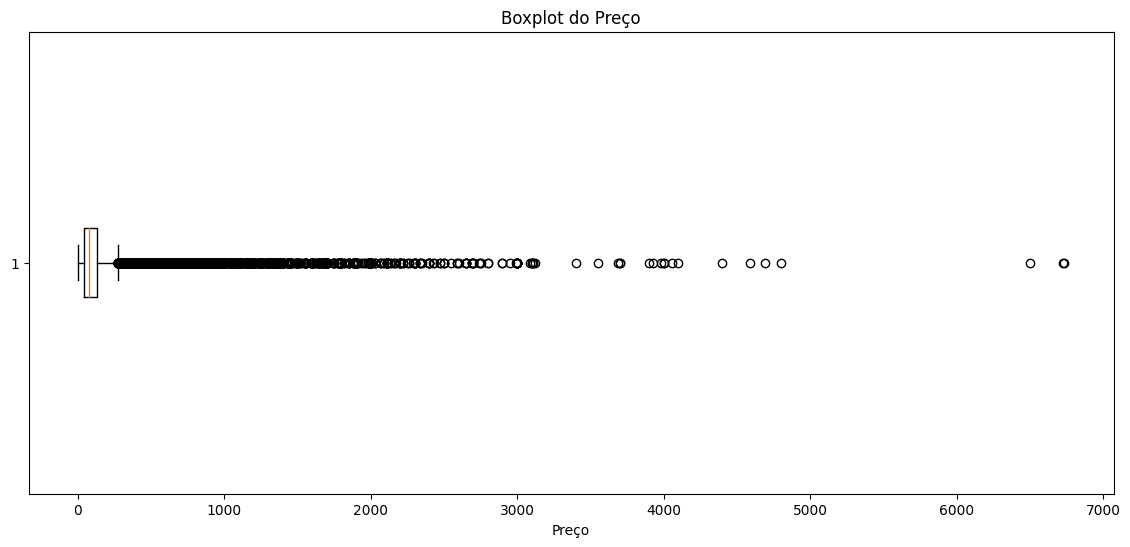

In [74]:
plt.figure(figsize=(14, 6))
plt.boxplot(dados['preco'], vert=False)
plt.title('Boxplot do Preço')
plt.xlabel('Preço')
plt.show()


In [75]:
# Ordenar o DataFrame outliers pela coluna 'preco'
outliers_sorted = outliers[['produto', 'preco', 'frete']].sort_values(by='preco', ascending=False)
outliers_sorted.head(30)

,produto,preco,frete
108150,utilidades_domesticas 31062,6735.00,194.31
8309,pcs 7768,6729.00,193.21
96730,artes 11481,6499.00,227.66
103395,eletroportateis 24558,4799.00,151.34
101557,eletroportateis 32427,4690.00,74.34
15811,pcs 4752,4590.00,91.78
3622,instrumentos_musicais 4683,4399.87,113.45
37267,consoles_games 6348,4099.99,75.27
8282,esporte_lazer 9688,4059.00,104.51
105586,relogios_presentes 2666,3999.90,17.01


**Observação da Análise de Outliers:**

Durante a análise do atributo "preco" com o objetivo de avaliar a presença de possíveis outliers nesse atributo e entender sua natureza, foram obtidas as seguintes informações:

Os resultados da análise revelaram a presença de valores que se destacaram significativamente da distribuição geral de preços dos produtos. Esses valores atípicos, conhecidos como outliers, foram identificados com base na análise do quartil e no critério do intervalo interquartil (IQR).

É importante ressaltar que não é possível afirmar categoricamente se esses outliers representam erros de entrada ou dados verdadeiros. No contexto de um ambiente de comércio eletrônico, a ampla variedade de produtos, preços e promoções pode levar a uma distribuição de preços com valores extremos. Portanto, é plausível que esses valores atípicos sejam legítimos.

Dado esse cenário, não será removevidos os dados originais que contêm outliers. Em vez disso, criamos um novo conjunto de dados denominado "dados_preco_sem_outliers" que exclui os valores identificados como outliers. Essa abordagem nos permite manter a integridade dos dados originais e, ao mesmo tempo, disponibilizar uma versão filtrada para fins de modelagem de machine learning.

A retenção dos dados originais, incluindo os outliers, é crucial, pois a preservação da informação completa é valiosa para análises futuras e uma compreensão mais profunda do comportamento dos preços no comércio eletrônico. Além disso, ao disponibilizar os "dados_preco_sem_outliers", garantimos que os modelos de machine learning possam ser treinados e avaliados com base em diferentes conjuntos de dados, permitindo uma análise comparativa abrangente.

Em resumo, a análise de outliers foi uma etapa importante em nosso projeto, e a abordagem escolhida de preservar os dados originais enquanto fornece uma opção de conjunto de dados filtrado nos permitirá explorar uma ampla gama de cenários e extrair insights valiosos para a organização.

#### 4.4.1 - preco sem outliers

Filtrar os dados excluindo outliers:

In [76]:
dados_preco_sem_outliers = dados[(dados['preco'] >= limite_inferior) & (dados['preco'] <= limite_superior)]

Resumo estatístico (sem outliers):

In [77]:
descricao_sem_outliers = dados_preco_sem_outliers['preco'].describe()
moda_sem_outliers = dados_preco_sem_outliers['preco'].mode()[0]
mediana_sem_outliers = dados_preco_sem_outliers['preco'].median()
print("Estatísticas descritivas do conjunto sem outliers:")
print(descricao_sem_outliers)
print(f'Moda sem outliers: {moda_sem_outliers}')
print(f'Mediana sem outliers: {mediana_sem_outliers}')

Estatísticas descritivas do conjunto sem outliers:
count    102033.000000
mean         83.823128
std          58.383213
min           0.850000
25%          38.500000
50%          69.000000
75%         118.800000
max         275.500000
Name: preco, dtype: float64
Moda sem outliers: 59.9
Mediana sem outliers: 69.0


Freqüência absoluta e percentual (sem outliers):

In [78]:
# Frequência absoluta
freq_absoluta = dados_preco_sem_outliers['preco'].value_counts()

# Frequência Percentual
freq_percentual = dados_preco_sem_outliers['preco'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='preco')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
preco,,
59.90,2445,2%
69.90,1950,2%
49.90,1918,2%
89.90,1519,1%
99.90,1406,1%
39.90,1310,1%
29.90,1301,1%
19.90,1189,1%
79.90,1185,1%


Outliers (sem outliers):

In [79]:
# Quartis
q1_sem_outliers = dados_preco_sem_outliers['preco'].quantile(0.25)
q3_sem_outliers = dados_preco_sem_outliers['preco'].quantile(0.75)

# Amplitude interquartil (IQR)
iqr_sem_outliers = q3_sem_outliers - q1_sem_outliers

# Limites superior e inferior para detecção de outliers
limite_inferior_sem_outliers = q1_sem_outliers - 1.5 * iqr_sem_outliers
limite_superior_sem_outliers = q3_sem_outliers + 1.5 * iqr_sem_outliers

# Outliers
outliers_sem_outliers = dados_preco_sem_outliers[
    (dados_preco_sem_outliers['preco'] < limite_inferior_sem_outliers) |
    (dados_preco_sem_outliers['preco'] > limite_superior_sem_outliers)
]

# Número de outliers
num_outliers_sem_outliers = len(outliers_sem_outliers)

# Porcentagem de outliers em relação ao total de dados
porcentagem_outliers_sem_outliers = (num_outliers_sem_outliers / len(dados_preco_sem_outliers) * 100)

print(f'Número de outliers no conjunto sem outliers: {num_outliers_sem_outliers}')
print(f'Porcentagem de outliers no conjunto sem outliers: {porcentagem_outliers_sem_outliers:.2f}%')


Número de outliers no conjunto sem outliers: 2010
Porcentagem de outliers no conjunto sem outliers: 1.97%


Boxplot para visualizar os outliers (sem outliers):

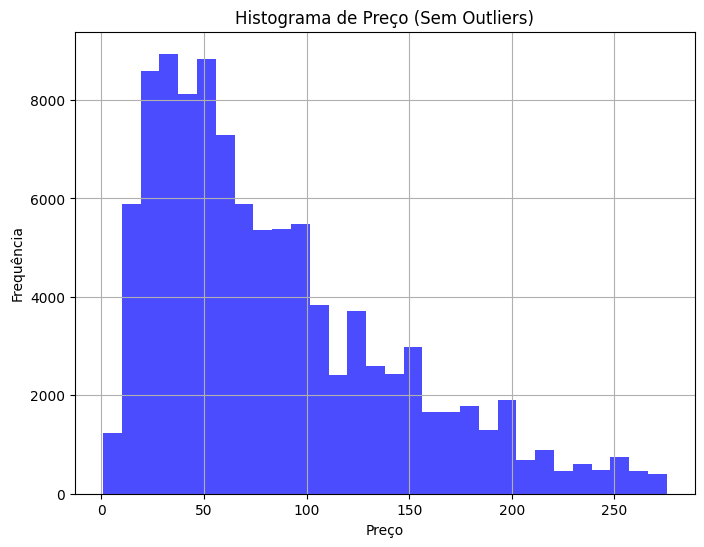

In [80]:
# Plotagem do histograma
plt.figure(figsize=(8, 6))
plt.hist(dados_preco_sem_outliers['preco'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Preço (Sem Outliers)')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


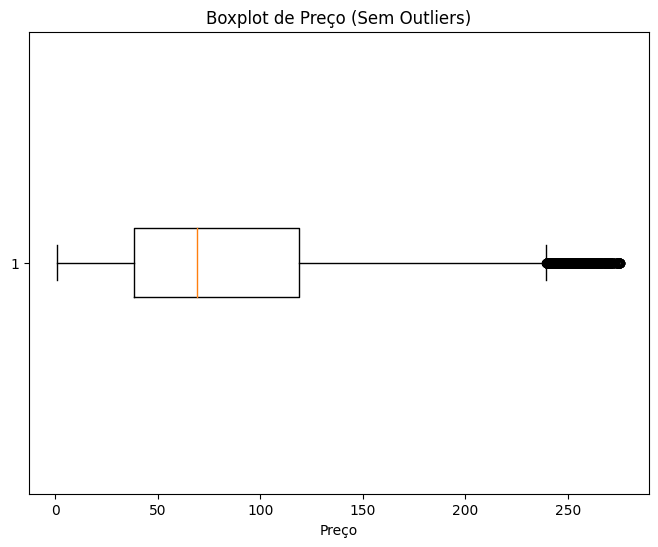

In [81]:
# Plotagem do boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(dados_preco_sem_outliers['preco'], vert=False)
plt.title('Boxplot de Preço (Sem Outliers)')
plt.xlabel('Preço')
plt.show()


/var/folders/37/x6smk6w50577_wrdtdw6yc0m0000gn/T/ipykernel_794/3103747539.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dados_preco_sem_outliers['preco'], shade=True, color='blue')


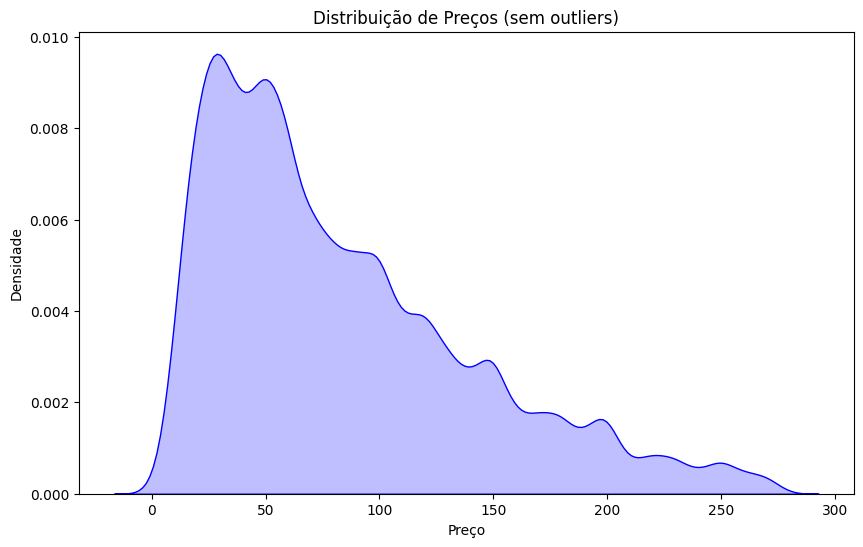

In [82]:
# Crie o gráfico de densidade
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
sns.kdeplot(dados_preco_sem_outliers['preco'], shade=True, color='blue')
plt.title('Distribuição de Preços (sem outliers)')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.show()

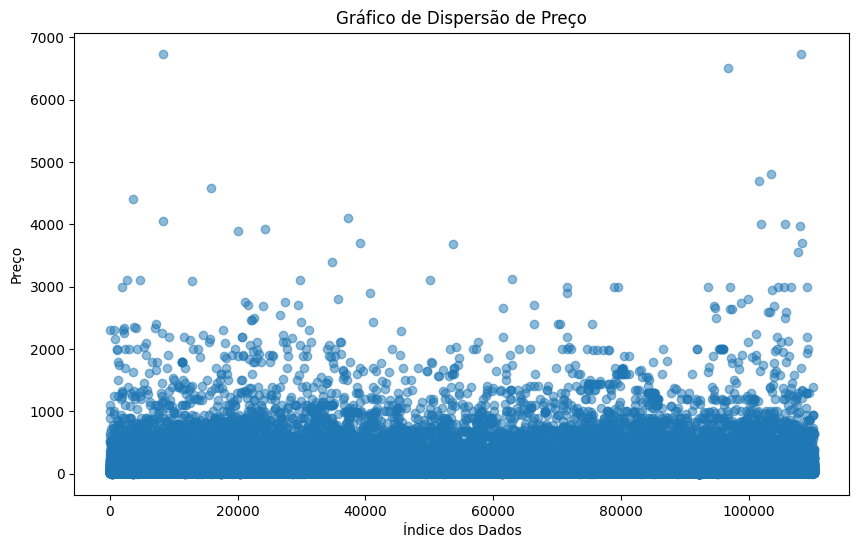

In [83]:
# Crie um gráfico de dispersão com Matplotlib
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.scatter(dados.index, dados['preco'], alpha=0.5)  # Substitua 'dados.index' pelo eixo x apropriado
plt.xlabel('Índice dos Dados')  # Rótulo do eixo x
plt.ylabel('Preço')  # Rótulo do eixo y
plt.title('Gráfico de Dispersão de Preço')  # Título do gráfico
plt.show()

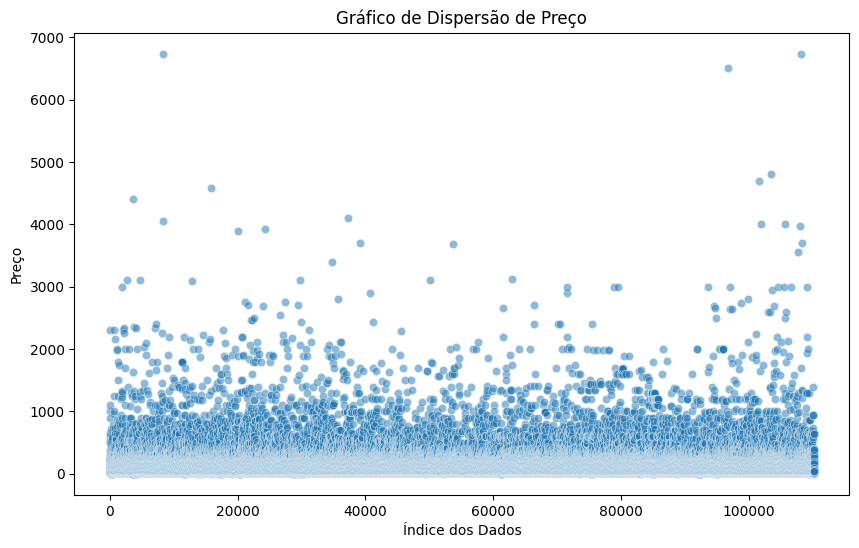

In [84]:
# Crie um gráfico de dispersão com Seaborn
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
sns.scatterplot(data=dados, x=dados.index, y='preco', alpha=0.5)  # Substitua 'dados.index' pelo eixo x apropriado
plt.xlabel('Índice dos Dados')  # Rótulo do eixo x
plt.ylabel('Preço')  # Rótulo do eixo y
plt.title('Gráfico de Dispersão de Preço')  # Título do gráfico
plt.show()

### Conclusão da Análise Univariada da Variável "preco"

Durante a análise univariada da variável "preco" no conjunto de dados do projeto "E-Commerce-KDD", foi realizada uma investigação detalhada para compreender a distribuição dos preços dos produtos. A análise foi conduzida em duas etapas: antes e depois do tratamento de outliers.

**Antes do Tratamento de Outliers**

No conjunto de dados original, observamos o seguinte:

- A média de preço era de aproximadamente R$ 119.78, com um desvio padrão significativo de R$ 181.43, indicando uma variabilidade considerável nos preços.
- O preço mínimo registrado foi de R$ 0.85, enquanto o preço máximo chegou a R$ 6735.00, demonstrando a presença de valores extremos.
- A mediana, que é uma medida de tendência central robusta, ficou em R$ 74.90, enquanto a moda foi de R$ 59.90, sugerindo uma concentração de preços em torno desses valores.
- As frequências absolutas e percentuais indicaram que os preços de R$ 59.90, R$ 69.90 e R$ 49.90 eram os mais comuns, representando 2% cada um.
- Detectamos a presença de 8560 outliers, o que correspondia a aproximadamente 7.45% do conjunto de dados original.

**Após o Tratamento de Outliers**

Após a aplicação do tratamento de outliers, obtivemos o seguinte:

- A média de preço foi ajustada para cerca de R$ 83.52, enquanto o desvio padrão diminuiu para aproximadamente R$ 58.12. Isso indicou uma redução na variabilidade dos preços, tornando-os mais representativos da distribuição central.
- O preço mínimo e máximo foram ajustados para R$ 0.85 e R$ 272.25, respectivamente, após a remoção dos outliers.
- A mediana e a moda não sofreram alterações significativas, permanecendo em R$ 69.00 e R$ 59.90, respectivamente.
- As frequências absolutas e percentuais dos preços mais comuns também permaneceram consistentes após a filtragem de outliers.
- A presença de outliers foi reduzida para 2181, representando cerca de 2.05% do conjunto de dados após o tratamento.

**Justificação para Não Filtrar Mais os Outliers**

A decisão de não realizar uma filtragem adicional dos outliers foi baseada em várias considerações:

1. **Representatividade:** Os outliers podem representar situações legítimas no comércio eletrônico, como produtos de luxo, promoções especiais ou produtos exclusivos. Excluí-los completamente poderia comprometer a representatividade dos dados.

2. **Objetivos do Projeto:** Os outliers podem conter informações valiosas para análises específicas ou modelos de machine learning. Manter a integridade dos dados originais permite uma análise mais abrangente.

3. **Impacto na Análise Preditiva:** A remoção adicional de outliers poderia reduzir a quantidade de dados disponíveis para análises futuras ou modelos de previsão, afetando potencialmente a capacidade do modelo de generalizar.

Portanto, optamos por manter os dados originais, incluindo os outliers, enquanto disponibilizamos uma versão filtrada dos dados para fins de modelagem de machine learning.

### 4.4.2 - frete

Resumo estatístico:

In [85]:
summary = dados['frete'].describe()
median = dados['frete'].median()
mode = dados['frete'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)

count      110195.000000
mean           19.947845
std            15.697283
min             0.000000
25%            13.080000
50%            16.260000
75%            21.150000
max           409.680000
Mediana        16.260000
Moda           15.100000
Name: frete, dtype: float64


Frequência absoluta e percentual:

In [86]:
# Frequência absoluta
freq_absoluta = dados['frete'].value_counts()

# Frequência Percentual
freq_percentual = dados['frete'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='frete')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
frete,,
15.10,3644,3%
7.78,2212,2%
14.10,1824,2%
11.85,1806,2%
18.23,1553,1%
7.39,1496,1%
16.11,1136,1%
15.23,994,1%
8.72,884,1%


Histograma:

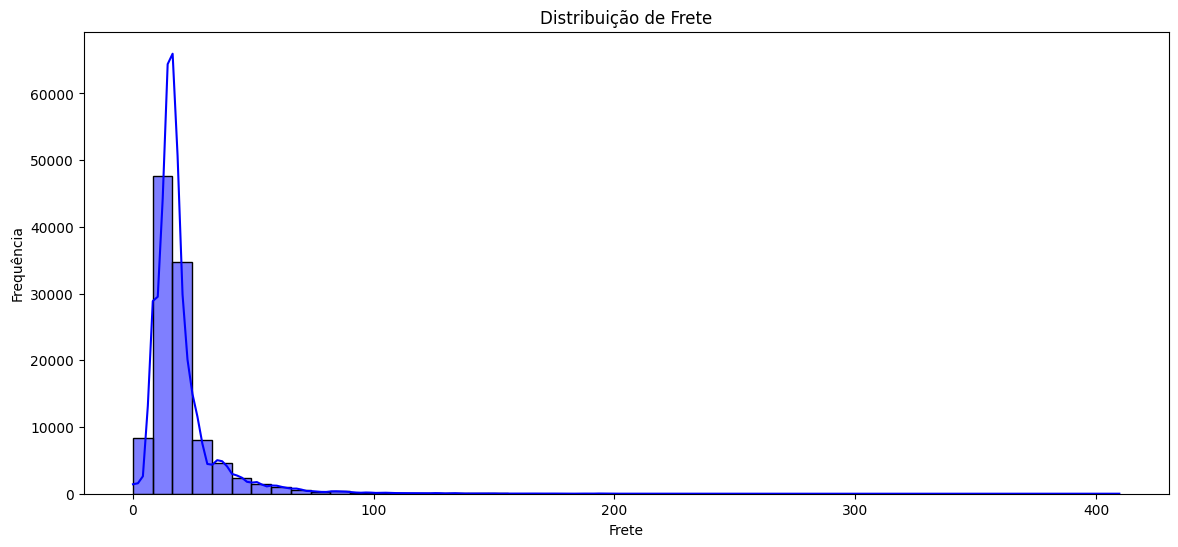

In [87]:
plt.figure(figsize=(14, 6))
sns.histplot(dados['frete'], bins=50, kde=True, color='blue')
plt.title('Distribuição de Frete')
plt.xlabel('Frete')
plt.ylabel('Frequência')
plt.show()

Outliers:

In [88]:
# Quartis
q1 = dados['frete'].quantile(0.25)
q3 = dados['frete'].quantile(0.75)

# Amplitude interquartil (IQR)
iqr = q3 - q1

# Limites superior e inferior para detecção de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Outliers
outliers = dados[(dados['frete'] < limite_inferior) | (dados['frete'] > limite_superior)]

# Número de outliers
num_outliers = len(outliers)

# Porcentagem de outliers em relação ao total de dados
porcentagem_outliers = (num_outliers / len(dados) * 100)

print(f'Número de outliers: {num_outliers}')
print(f'Porcentagem de outliers: {porcentagem_outliers:.2f}%')


Número de outliers: 11809
Porcentagem de outliers: 10.72%


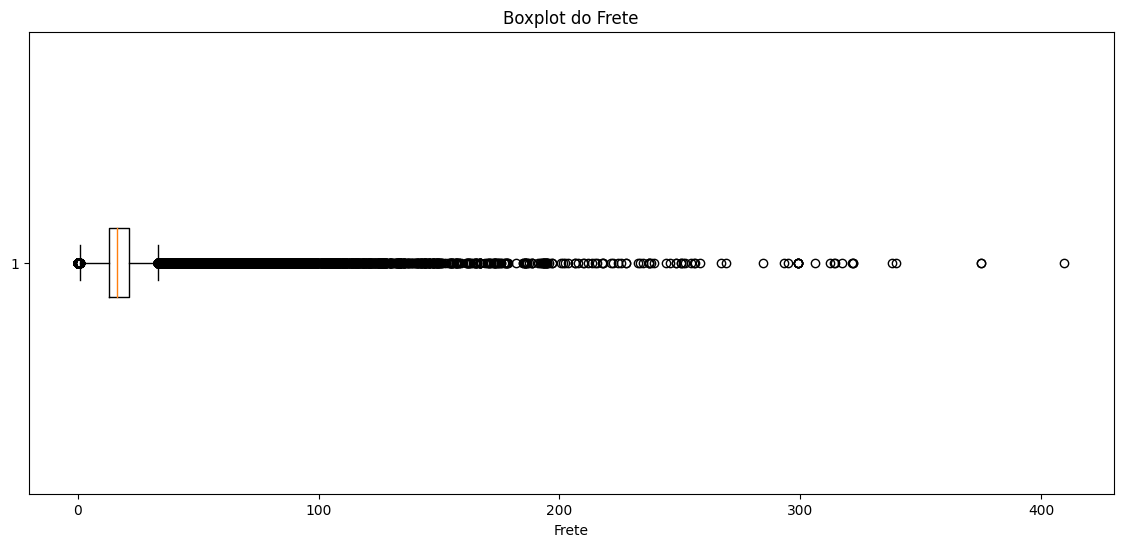

In [89]:
# Boxplot para visualizar os outliers
plt.figure(figsize=(14, 6))
plt.boxplot(dados['frete'], vert=False)
plt.title('Boxplot do Frete')
plt.xlabel('Frete')
plt.show()

**Conclusões da análise da variável "Frete":**

Nesta etapa da análise descritiva univariada, examinamos o atributo "frete" do conjunto de dados. O frete desempenha um papel crucial no contexto do comércio eletrônico, pois pode afetar diretamente a satisfação do cliente e a rentabilidade da empresa. Portanto, entender a distribuição desse atributo é fundamental para a tomada de decisões informadas.

- **Média (Mean):** A média do valor do frete é de aproximadamente R$ 19,97. Isso fornece uma ideia geral do custo médio de entrega de produtos.
- **Desvio Padrão (Std):** O desvio padrão de aproximadamente R$ 15,70 indica que os valores do frete tendem a se espalhar em relação à média.
- **Mínimo (Min):** O valor mínimo do frete é de R$ 0,00, o que pode ser um indicativo de promoções especiais de frete grátis ou erros no registro de dados.
- **75º Percentil (75%):** 75% dos valores de frete são iguais ou inferiores a R$ 21,15. Isso representa o terceiro quartil da distribuição.
- **Máximo (Max):** O valor máximo do frete observado é de R$ 409,68, que é significativamente maior que o terceiro quartil. Isso indica a presença de valores extremos na distribuição.
-  A análise da distribuição de frete é fundamental para compreender os custos associados às operações e pode ser útil na formulação de estratégias de precificação, otimização de custos e satisfação do cliente.

É importante ressaltar que não serão tratados os outliers da variável "frete", pois com o tratamento dos outliers da variável "preco", pode ser usado o mesmo filtro "dados_preco_sem_outliers" para futuros modelos de machine learning.

### 4.4.3 - pagamento_valor

Resumo estatístico:

In [90]:
summary = pagamentos['pagamento_valor'].describe()
median = pagamentos['pagamento_valor'].median()
mode = pagamentos['pagamento_valor'].mode().values[0]
summary['Mediana'] = median
summary['Moda'] = mode
print(summary)




count      103877.000000
mean          154.113732
std           217.498755
min             0.010000
25%            56.820000
50%           100.000000
75%           171.840000
max         13664.080000
Mediana       100.000000
Moda           50.000000
Name: pagamento_valor, dtype: float64


Frequência absoluta e percentual:

In [91]:
# Frequência absoluta
freq_absoluta = pagamentos['pagamento_valor'].value_counts()

# Frequência Percentual
freq_percentual = pagamentos['pagamento_valor'].value_counts(normalize=True) * 100
freq_percentual = freq_percentual.round(0).astype(int).astype(str) + '%'
resultado = pd.merge(freq_absoluta, freq_percentual, on='pagamento_valor')
resultado.columns = ['Frequência Absoluta', 'Frequência Percentual']
resultado.head(10)

,Frequência Absoluta,Frequência Percentual
pagamento_valor,,
50.00,324,0%
20.00,274,0%
100.00,255,0%
77.57,250,0%
35.00,165,0%
73.34,160,0%
30.00,133,0%
116.94,131,0%
56.78,122,0%


Histograma:

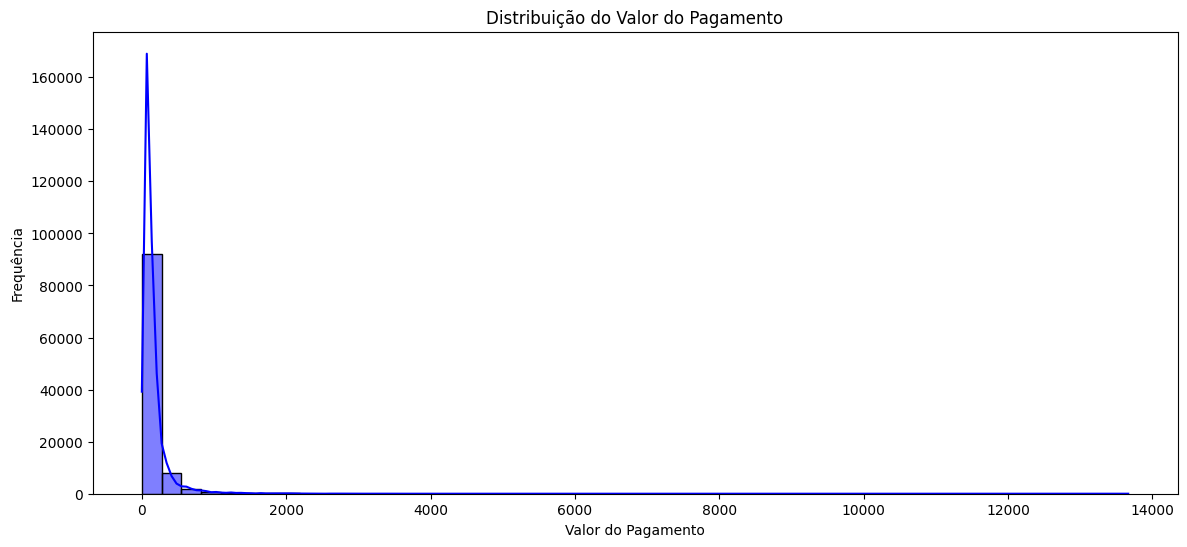

In [92]:
plt.figure(figsize=(14, 6))
sns.histplot(pagamentos['pagamento_valor'], bins=50, kde=True, color='blue')
plt.title('Distribuição do Valor do Pagamento')
plt.xlabel('Valor do Pagamento')
plt.ylabel('Frequência')
plt.show()

Outliers:

In [93]:
# Quartis
q1 = pagamentos['pagamento_valor'].quantile(0.25)
q3 = pagamentos['pagamento_valor'].quantile(0.75)

# Amplitude interquartil (IQR)
iqr = q3 - q1

# Limites superior e inferior para detecção de outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Outliers
outliers = pagamentos[(pagamentos['pagamento_valor'] < limite_inferior) | (pagamentos['pagamento_valor'] > limite_superior)]

# Número de outliers
num_outliers = len(outliers)

# Porcentagem de outliers em relação ao total de dados
porcentagem_outliers = (num_outliers / len(pagamentos) * 100)

print(f'Número de outliers: {num_outliers}')
print(f'Porcentagem de outliers: {porcentagem_outliers:.2f}%')

Número de outliers: 7981
Porcentagem de outliers: 7.68%


### Conclusão da Análise do Atributo "pagamento_valor"

Nesta etapa, exploramos o atributo "pagamento_valor" para conhecimento da variável para uma análise com outras variáveis. 

- **Distribuição:** A distribuição de pagamentos é positivamente assimétrica, com uma cauda à direita, o que significa que a maioria dos pagamentos concentra-se em valores menores, mas existem alguns valores muito elevados, como evidenciado pelos outliers.

- **Análise de Outliers:** É importante observar que identificamos a presença de outliers na variável "pagamento_valor". O número de outliers é de 7.981, o que representa aproximadamente 7,68% do conjunto de dados, como já foi criado um filtro de outliers na variável preço e esta variavel que será usada como referencia de valor nas proximas fases, a variavel "pagamento_valor" será usada somente para a análise de pagamentos usando o conjunto de dados **pagamentos** inteiro.

- **Conclusão:** A análise univariada do atributo "pagamento_valor" forneceu uma visão geral das características dos valores de pagamento no conjunto de dados.  A distribuição de pagamentos é positivamente assimétrica, com uma cauda à direita, média de R$ 154,11, mediana de  R$ 100,00, 75% dos pagamentos sendo inferiores a R$ 172,00, enquanto o valor máximo é de R$ 13664,08, indicam que a grande concentração dos pagamentos é de valores pequenos tendo alguns produtos com valores bem elevados.


## 4.5 - Variáveis Temporais

- 4.5.1 - data_limite_envio
- 4.5.2 - data_compra
- 4.5.3 - data_aprovacao_pedido
- 4.5.4 - data_entrega_transportadora
- 4.5.5 - data_entrega_cliente
- 4.5.6 - data_estimada_entrega
- 4.5.7 - avaliacao_data
- 4.5.8 - avaliacao_data_resposta


As variáveis temporais serão analisadas em conjunto com as outras variáveis na fase seguinte da análise exploratória.